***Spectral Estimation and Digital Filtering of an Audio Signal***
==============
**Student Name:** *Ahmed Mohamed Ahmed*

**Student ID  :** *202200977*

# **Part 1**

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal
import pandas as pd
import IPython.display as ipd

## 1.1- Reading from an audio file

In [40]:
data, fs = librosa.load("music_test_fayrouz.mp3",sr=32000)
fs, data

(32000, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

## 1.2- Capturing around 3 seconds from the middle of the file

In [41]:
middle_index = len(data) // 2
samples = int(3*fs)
start_index = middle_index - samples //2
end_index = start_index  + samples 
segment = data[start_index:end_index]
# making sure that the audio segment has only 1 channel 
# and if not we will take only the first channel
if len(segment.shape) > 1:
    segment = segment[:,0]
# print length of segment to make sure it's withing the range 
len(segment)/ fs

3.0

## 1.3- Plotting the audio signal over time

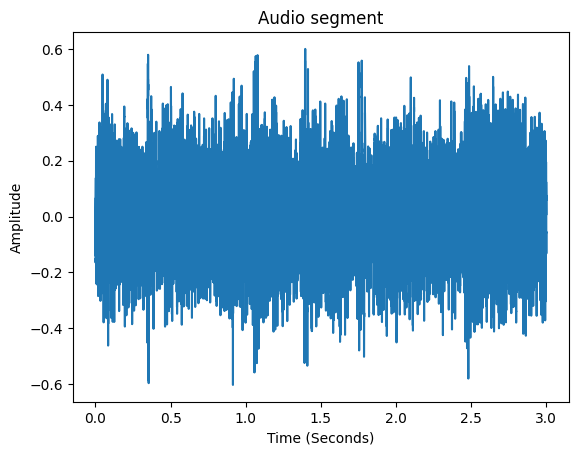

In [42]:
time = np.arange(len(segment)) / fs
plt.figure()
plt.plot(time,segment)
plt.title("Audio segment")
plt.xlabel("Time (Seconds)")
plt.ylabel("Amplitude")
plt.show()
ipd.display(ipd.Audio(segment, rate=fs))


## 1.4- Generating interference tone

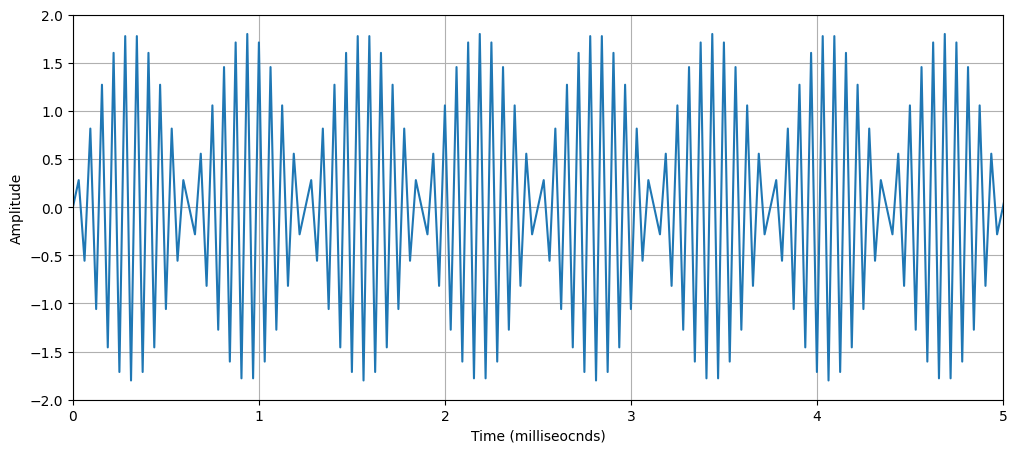

In [43]:
interference_f = 15200
interference_amplitude = 1.8
interference = interference_amplitude * np.sin(2* np.pi *interference_f * time)
time_ms =time * 1000
plt.figure(figsize=(12,5))
plt.plot(time_ms, interference)  
plt.xlabel("Time (milliseocnds)")
plt.ylabel("Amplitude")
plt.grid(True)  
plt.xlim(0, 5)
plt.ylim(-2, 2)
plt.show()

ipd.display(ipd.Audio(interference, rate=fs))


## 1.5- Adding the interference with audio segment and comparing 

Orginal audio segment : 


with interference : 


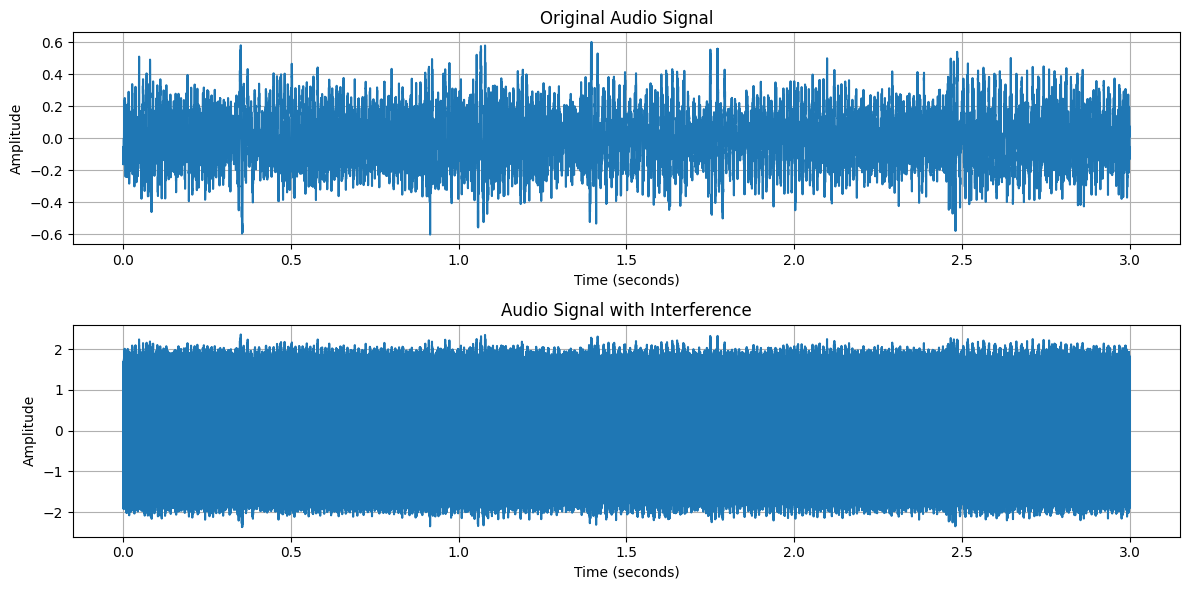

In [44]:
new_segment = segment + interference
print("Orginal audio segment : ")
ipd.display(ipd.Audio(segment, rate=fs))
print("with interference : ")
ipd.display(ipd.Audio(new_segment, rate=fs))
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, segment)
plt.title('Original Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(time, new_segment)
plt.title('Audio Signal with Interference')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.6- Plotting the power spectral using Welch's method

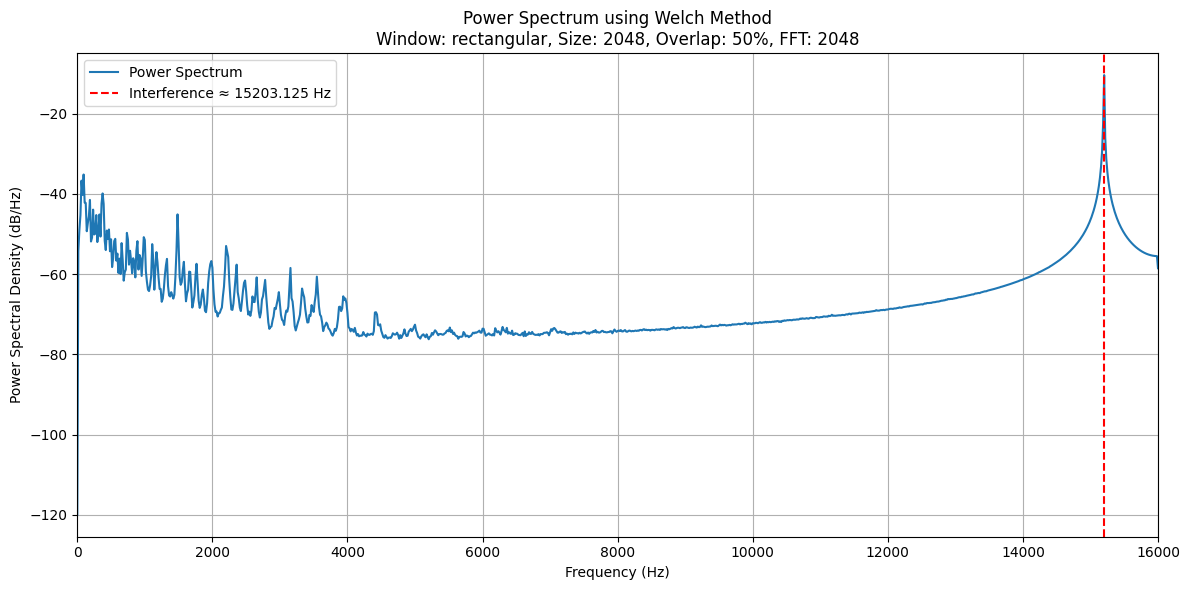

Detected interference frequency: 15203.125 Hz with power -10.422184196717872 dB


(array([0.0000000e+00, 1.5625000e+01, 3.1250000e+01, ..., 1.5968750e+04,
        1.5984375e+04, 1.6000000e+04]),
 array([9.31022048e-35, 3.72148221e-06, 1.25938422e-05, ...,
        2.79962923e-06, 2.79008155e-06, 1.39345192e-06]),
 15203.125)

In [45]:
def plot_welch_spectrum(data, fs, fft_size, window_size, window_type='hann', overlap_percent=50):
    """
    Plot the single-sided power spectrum using Welch's method and detect interference frequency.
    
    Parameters:
    -----------
    data : array_like
        The input signal
    fs : float
        Sampling frequency
    fft_size : int
    window_size : int
    window_type : str
    overlap_percent : float
        Percentage overlap between segments
    """

    # Calculate overlap in samples
    overlap = int(window_size * overlap_percent / 100)

    # Define window functions
    window_types = {
        'hann': np.hanning(window_size),
        'hamming': np.hamming(window_size),
        'blackman': np.blackman(window_size),
        'rectangular': np.ones(window_size)
    }

    window = window_types.get(window_type.lower())
    if window is None:
        print(f"Window type '{window_type}' not recognized. Using Hann window instead.")
        window = np.hanning(window_size)

    # Compute Welch PSD
    freqs, psd = signal.welch(data, fs=fs, window=window, nperseg=window_size,
                              noverlap=overlap, nfft=fft_size, return_onesided=True)
   
    # Convert to dB scale
    psd_db = 10 * np.log10(psd + 1e-12)  
    peak_index = np.argmax(psd)
    interference_freq = freqs[peak_index]
    interference_power = psd_db[peak_index]

    # Plot the PSD
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, psd_db, label='Power Spectrum')
    plt.axvline(interference_freq, color='r', linestyle='--', linewidth=1.5, label=f'Interference ≈ {interference_freq} Hz')
    plt.title(f'Power Spectrum using Welch Method\nWindow: {window_type}, Size: {window_size}, Overlap: {overlap_percent}%, FFT: {fft_size}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, fs/2)
    plt.tight_layout()
    plt.show()

    print(f"Detected interference frequency: {interference_freq} Hz with power {interference_power} dB")

    return freqs, psd, interference_freq


fft_size = 2048  
window_size = 2048 
window_type = 'rectangular' 
overlap_percent = 50  
plot_welch_spectrum(new_segment, fs, fft_size, window_size, window_type, overlap_percent)

## 1.7- Explain the effect of each of the parameters in step (6) on the power spectrum. Use different spectral plots to illustrate your point.

### `1. Window Size :`
- **Effect:**
    - If the window becomes larger, the frequency resolution will also be better, but, on the other hand, the averaging will be reduced. On the other hand, a smaller window smooths the approximation by increasing the number of segments and therefore lowering the variance. Choosing the window size is all about trade-offs between frequency resolution and variance reduction. A window size that is too big will result in less averaging and a proper compromise will be to have a smaller one which will result in some of information being gone.
### `2. FFT Size :`
- **Effect:**
    - The larger the Fast Fourier Transform (FFT), the finer the frequency scale, as now more number of bins are available. When the FFT size is larger than the window size, the introduction of zero-padding creates smoothing of the resolution with no actual improvement in the resolution. Overly large FFTs can lead to inefficient usage of computational resources without any real benefits in resolution, thus, the importance of not using needlessly large FFTs cannot be overemphasized at all.
### `3. Overlapping % :`
- **Effect:**
    - More overlapping leads to producing a higher number of segments that in turn a better average estimate and less variance. This, however, also leads to an increase in the time required for computation. A 50% overlap could be sage, however, it would be wise not to go over 75% as there is redundancy in the data.
### `4. Window Shape :`
- **Effect:**
    - The choice of the shape of the window will make a difference in the level of the leakage that will be noticed, since each shape type presents different advantages and drawbacks in terms of the width of the main lobe and how the side lobes are suppressed:
        - Rectangular: highest level of side lobe due to its very narrow shape.
        - Hann: fine balance, commonly used.
        - Hamming: superior side lobe suppression as compared to Hann.
        - Blackman: side lobe leakage significantly reduced, though the price is a wider main lobe.
        - Kaiser: Leakage and resolution are both customizable.
### `4. Signal Frequency :`
- **Effect:**
    - The signal frequency was adjusted to the frequency axis and the FFT bins are converted into the actual frequency values. This sample is also responsible for the Nyquist limit, the highest frequency that can be analyzed (fs / 2). A high sampling frequency ensures that fs is high enough to cover all those frequencies that are of interest to you and not cause an aliasing.

### `4. Intereference Frequency :`
- **Effect:**
    - Interference frequency reveals the unwanted frequency that has been exposed to the signal. Imagine you are looking for this interference signal using a tool of sufficient frequency resolution. The knowledge of interference is very important to further process the signal. The frequency of the interference must be kept below the Nyquist frequency (fs/2) to avoid aliasing.

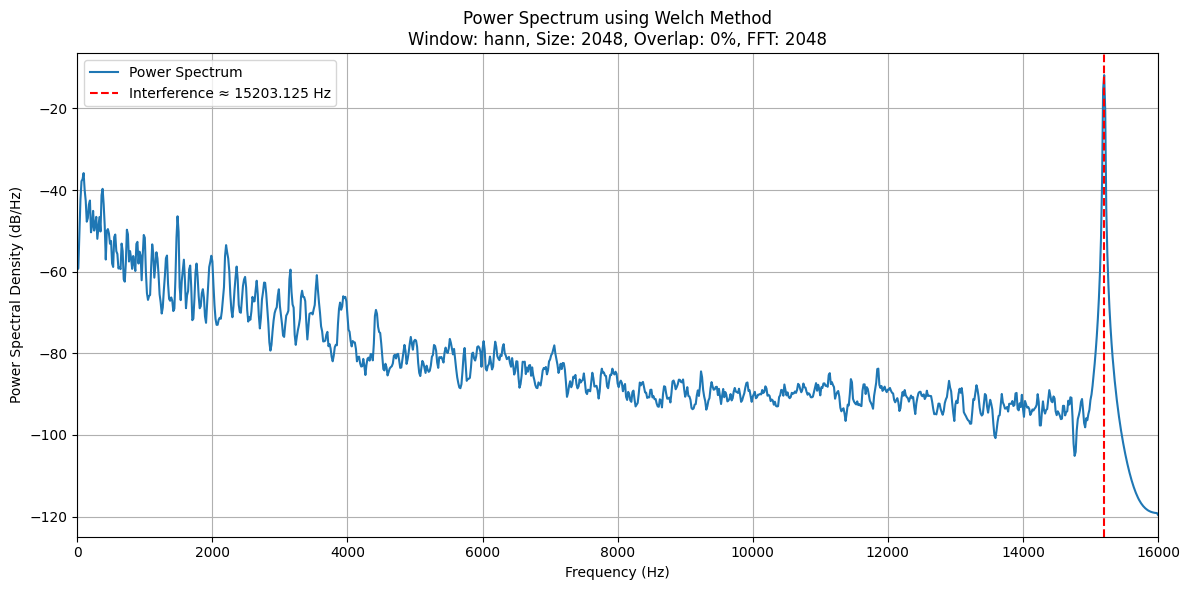

Detected interference frequency: 15203.125 Hz with power -11.83051167898502 dB


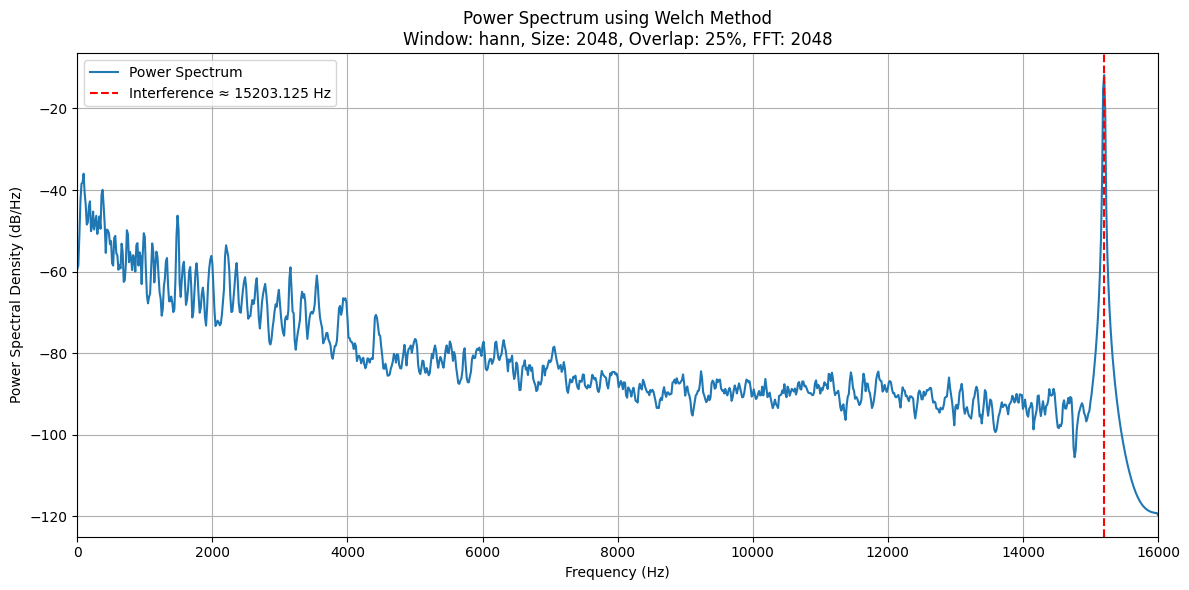

Detected interference frequency: 15203.125 Hz with power -11.830511902162765 dB


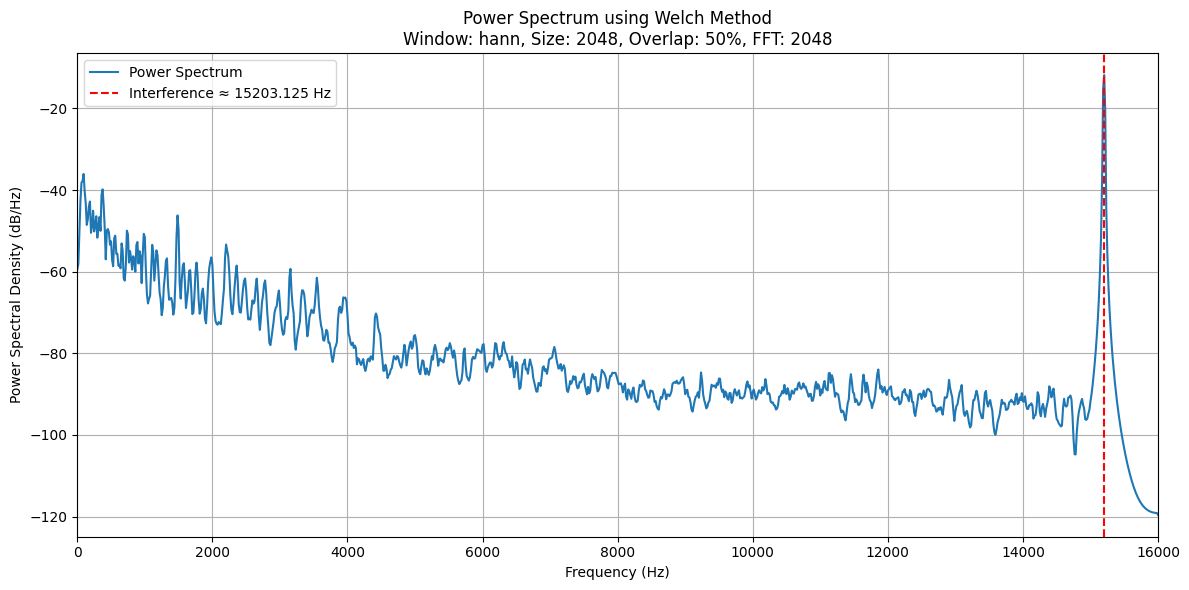

Detected interference frequency: 15203.125 Hz with power -11.830511999978867 dB


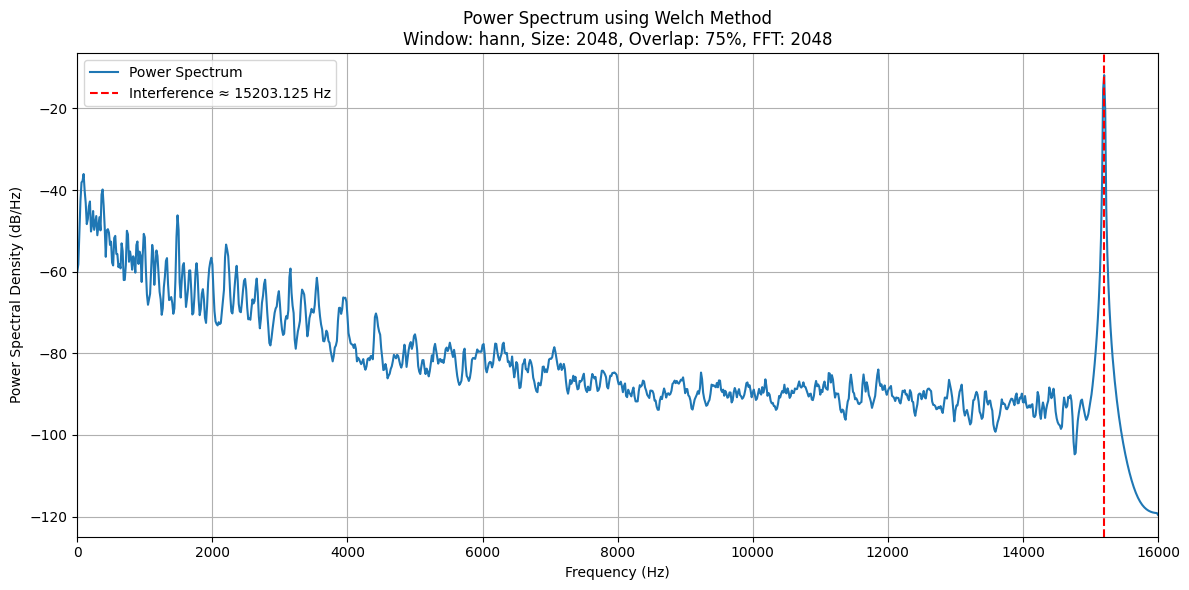

Detected interference frequency: 15203.125 Hz with power -11.83051195346261 dB


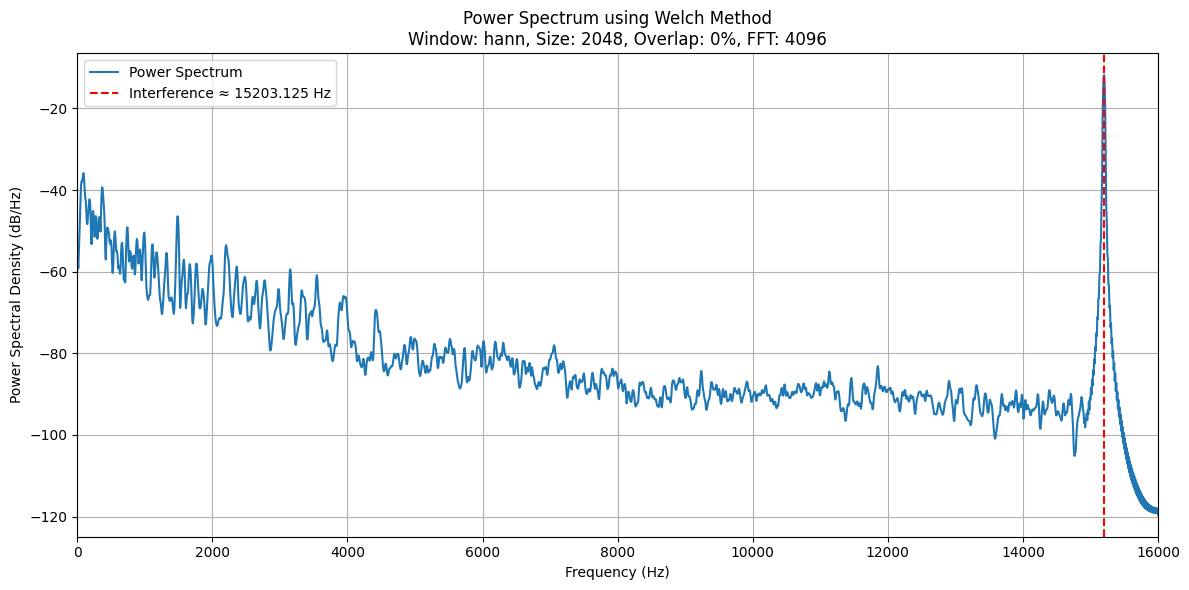

Detected interference frequency: 15203.125 Hz with power -11.830511678985022 dB


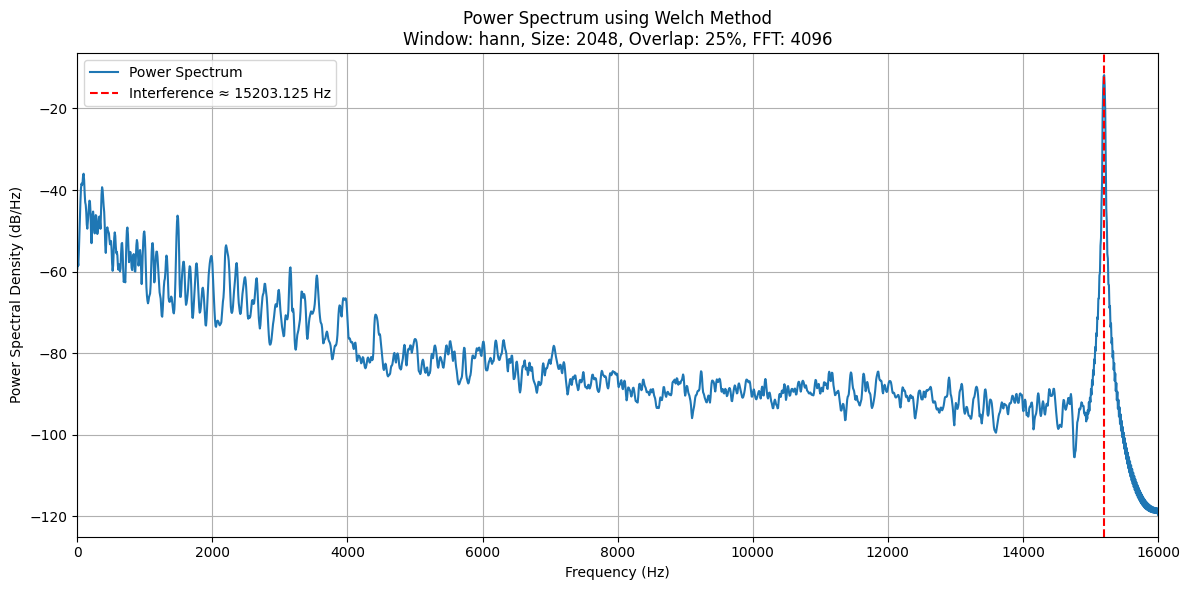

Detected interference frequency: 15203.125 Hz with power -11.830511902162765 dB


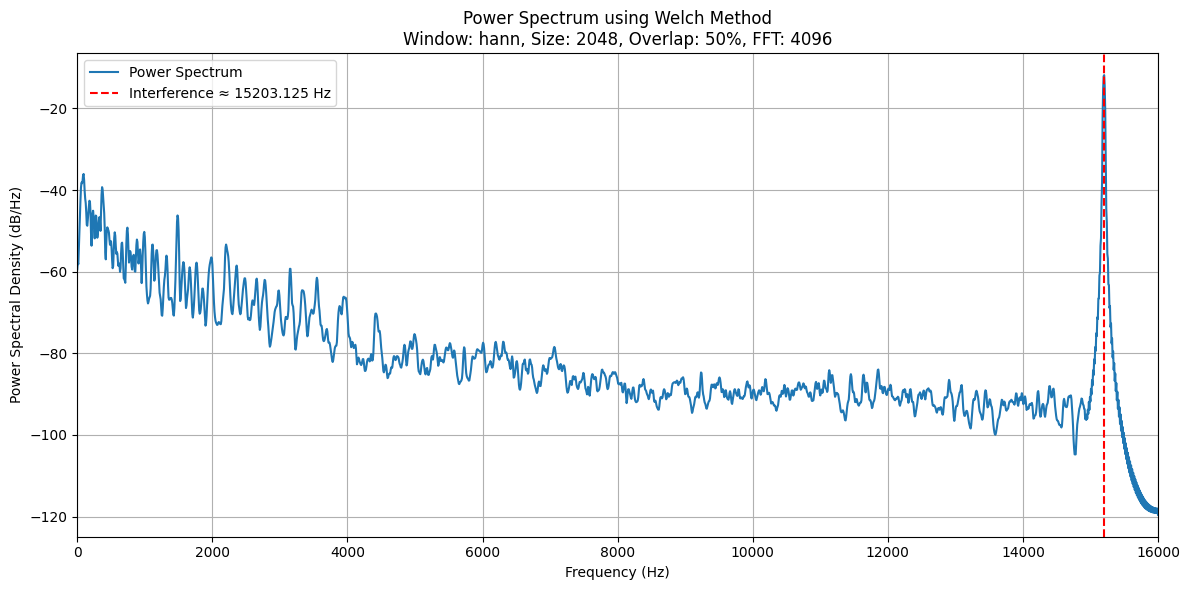

Detected interference frequency: 15203.125 Hz with power -11.830511999978867 dB


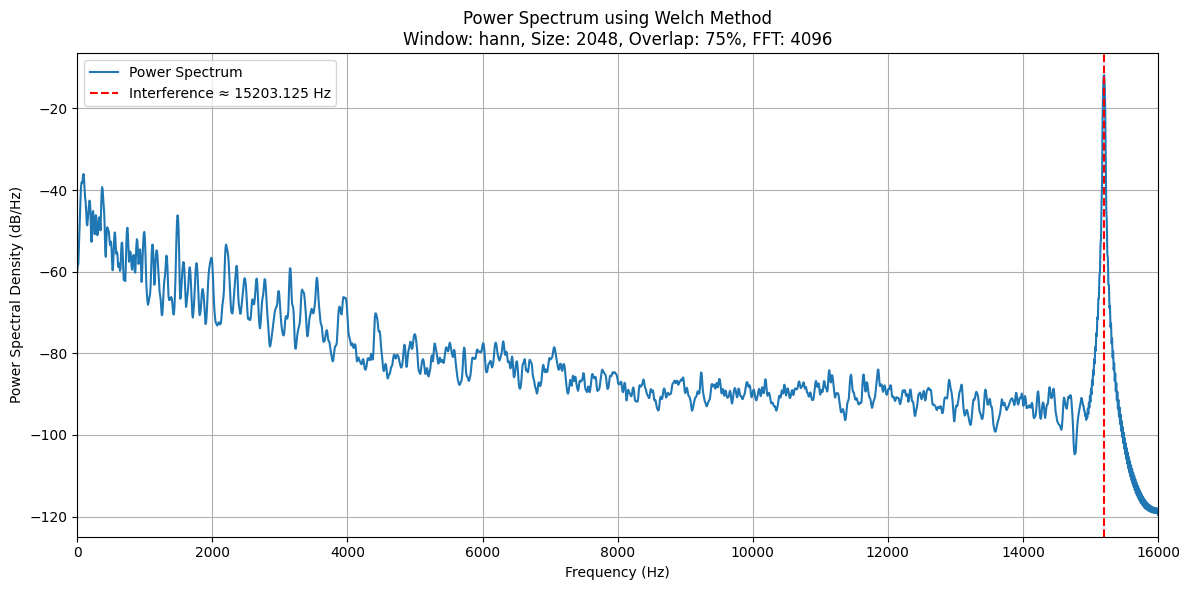

Detected interference frequency: 15203.125 Hz with power -11.830511953462612 dB


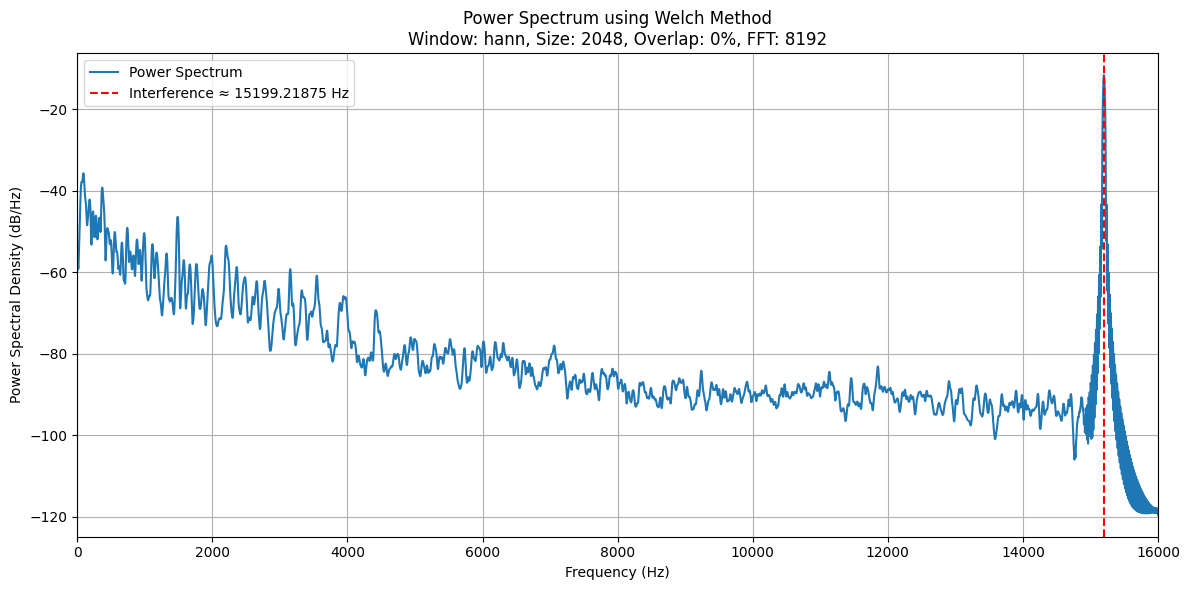

Detected interference frequency: 15199.21875 Hz with power -11.620076184225363 dB


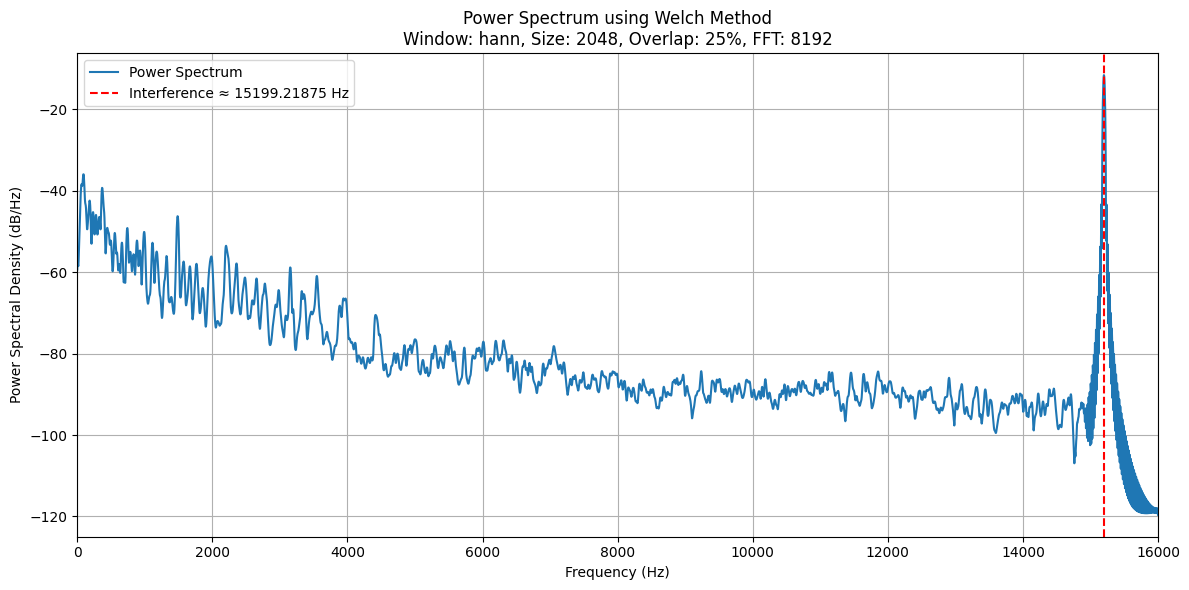

Detected interference frequency: 15199.21875 Hz with power -11.620076540633999 dB


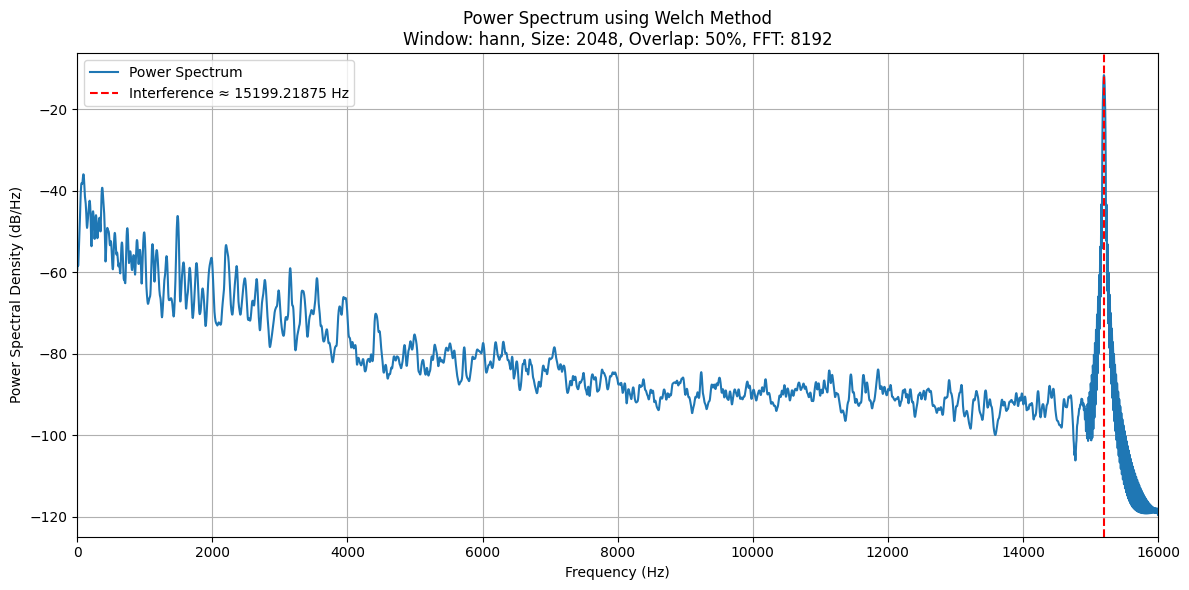

Detected interference frequency: 15199.21875 Hz with power -11.620076659781533 dB


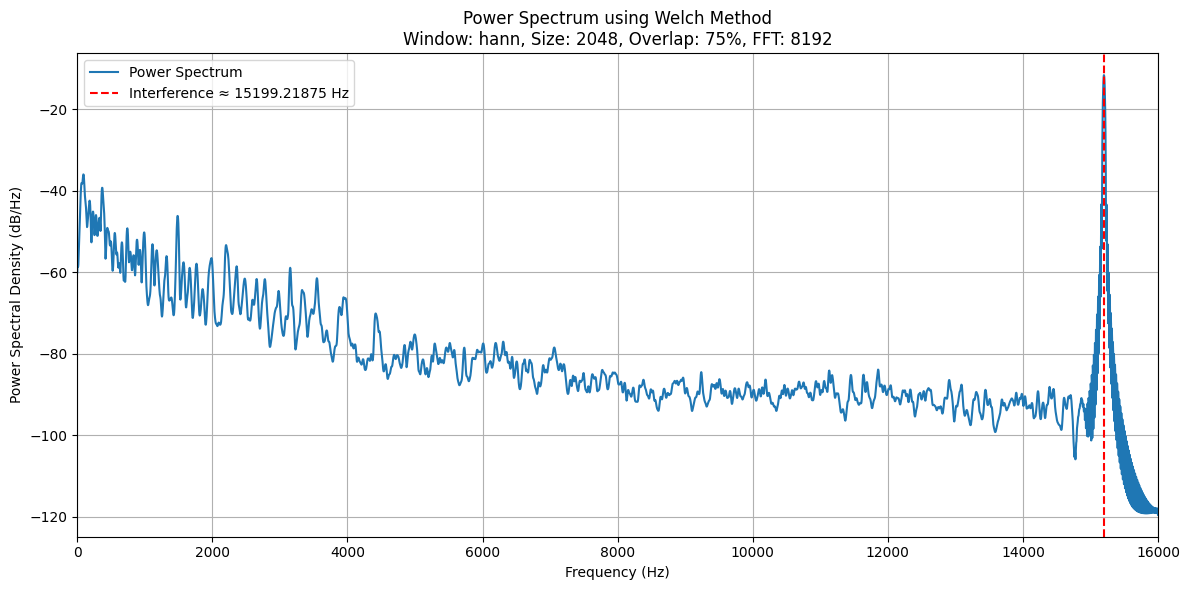

Detected interference frequency: 15199.21875 Hz with power -11.620076652317692 dB


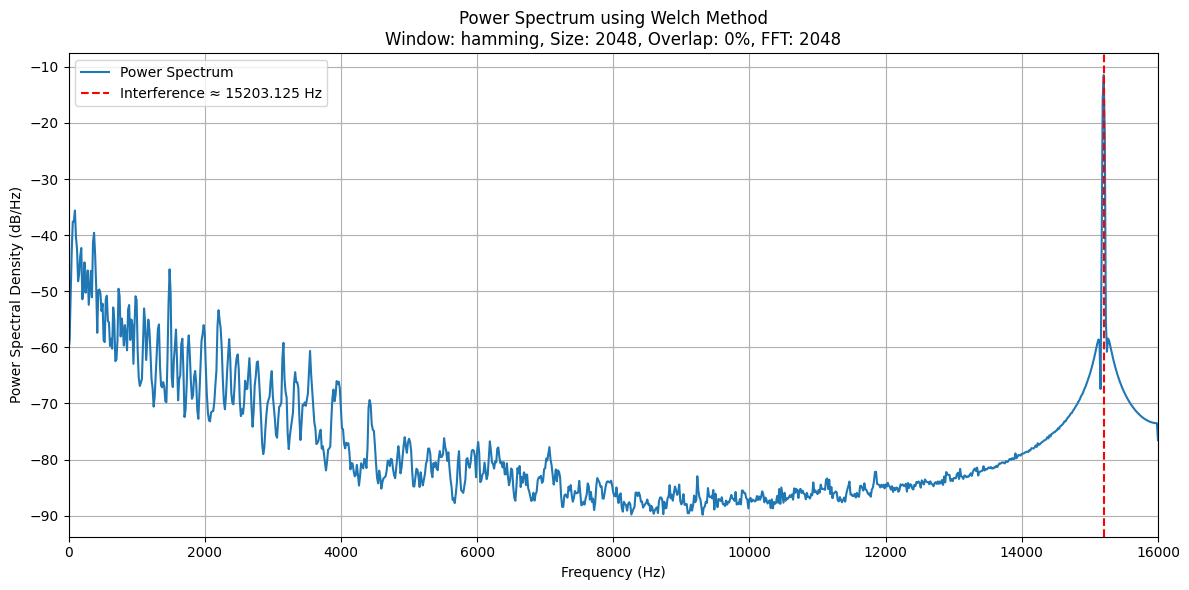

Detected interference frequency: 15203.125 Hz with power -11.465104028543644 dB


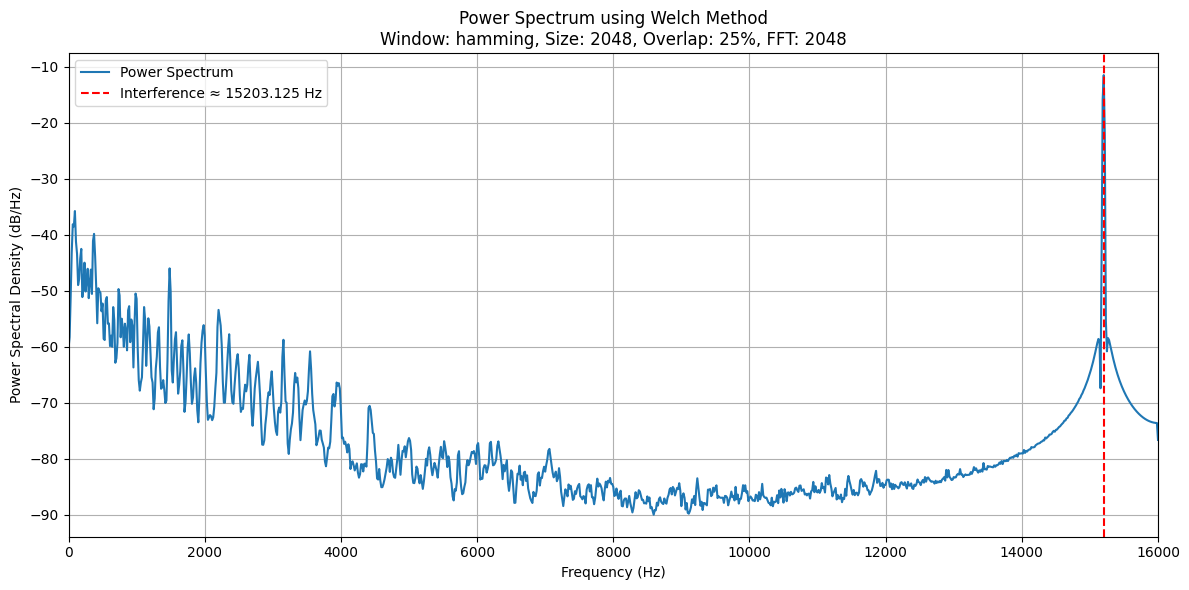

Detected interference frequency: 15203.125 Hz with power -11.465141024647796 dB


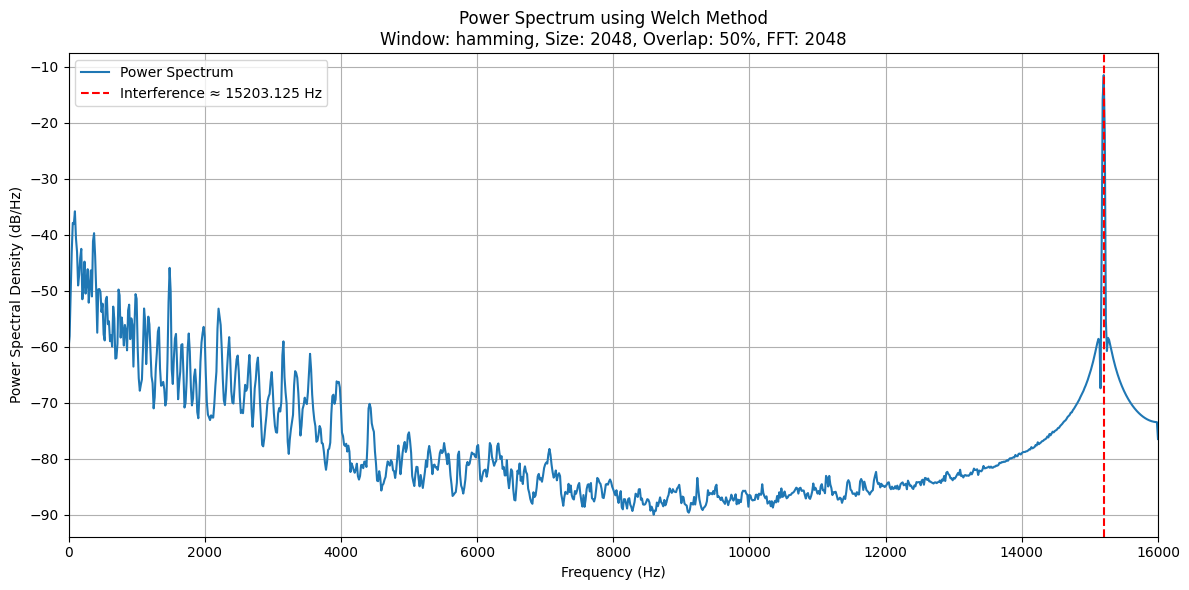

Detected interference frequency: 15203.125 Hz with power -11.465075754149312 dB


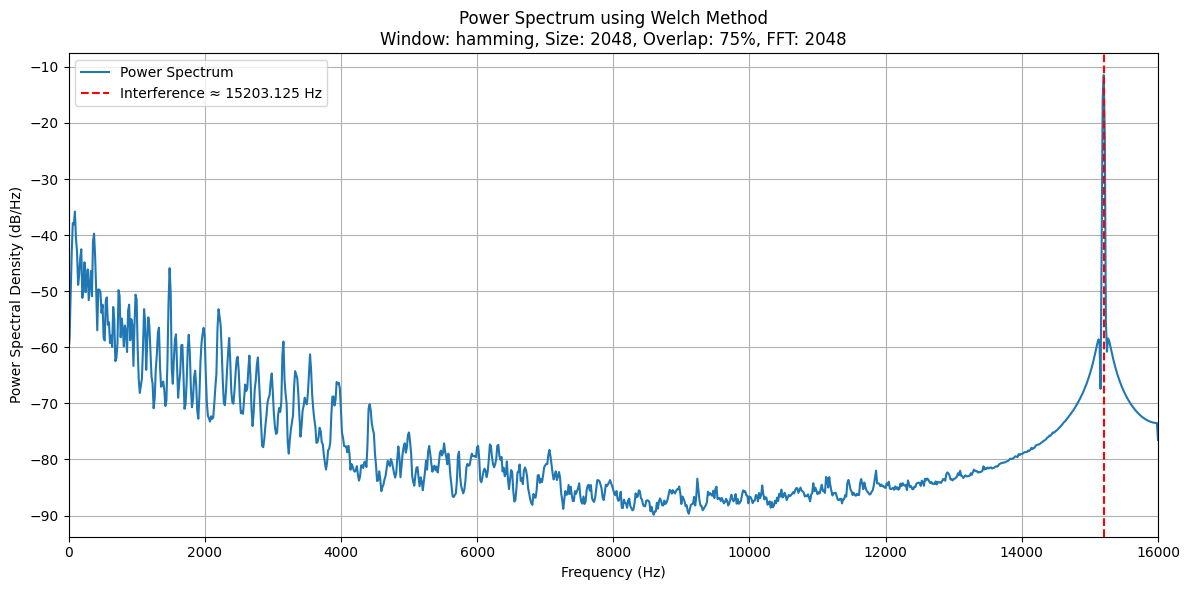

Detected interference frequency: 15203.125 Hz with power -11.465095059827261 dB


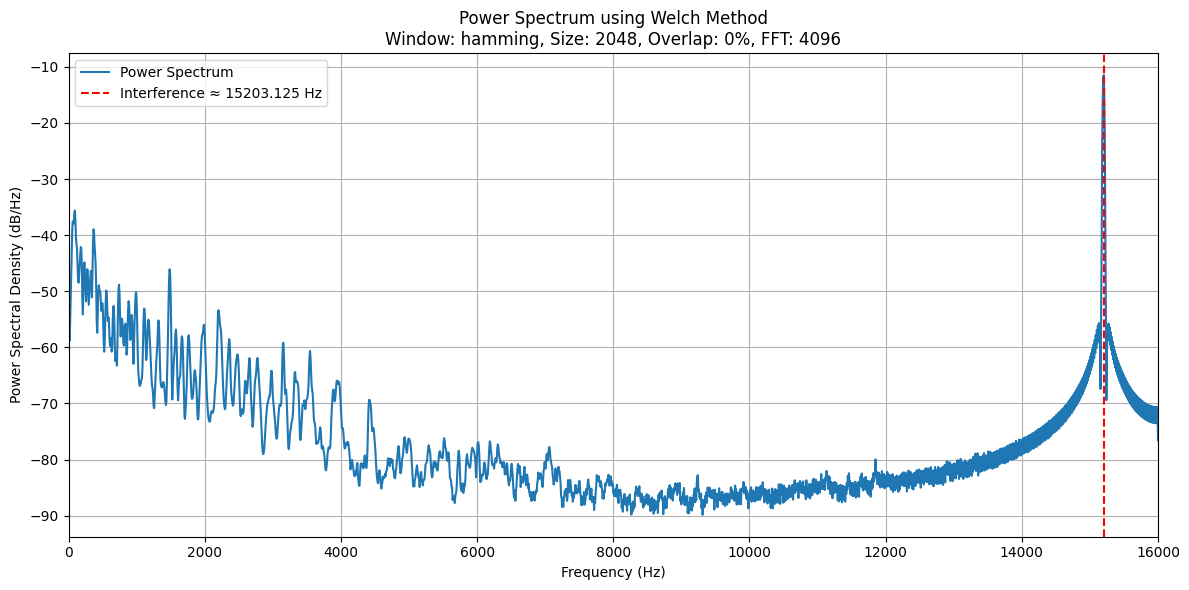

Detected interference frequency: 15203.125 Hz with power -11.465104028543646 dB


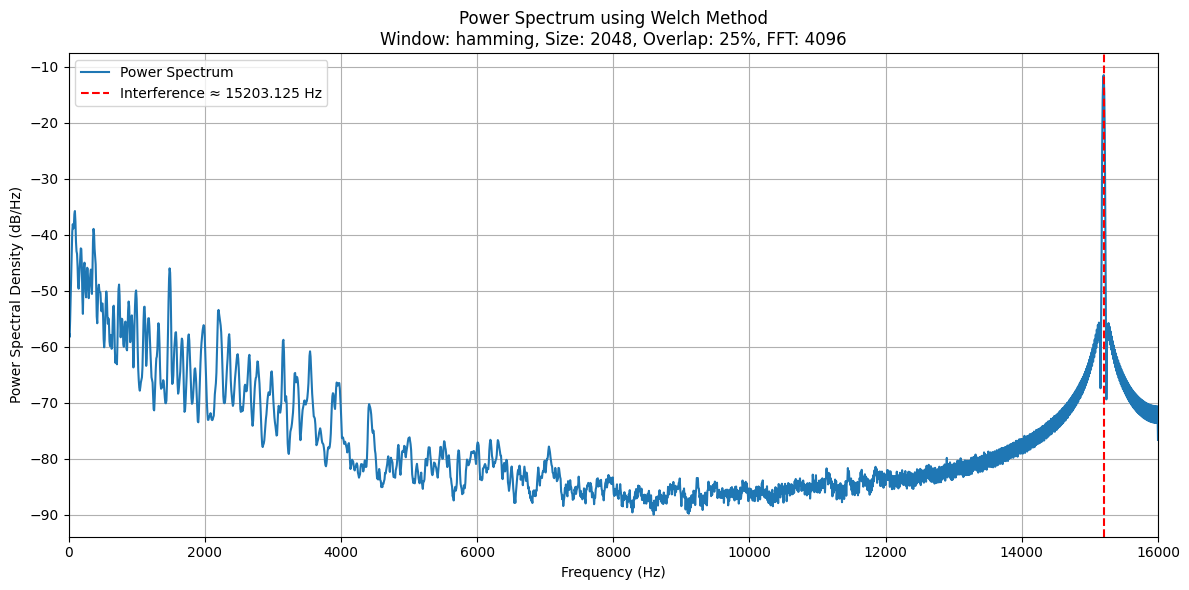

Detected interference frequency: 15203.125 Hz with power -11.465141024647796 dB


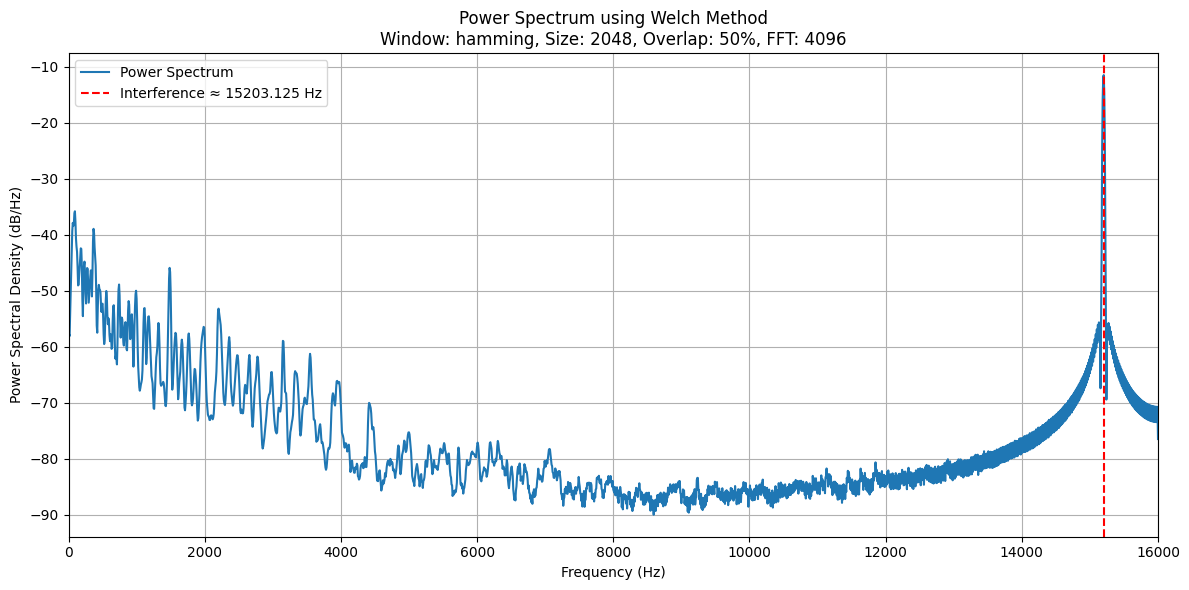

Detected interference frequency: 15203.125 Hz with power -11.465075754149312 dB


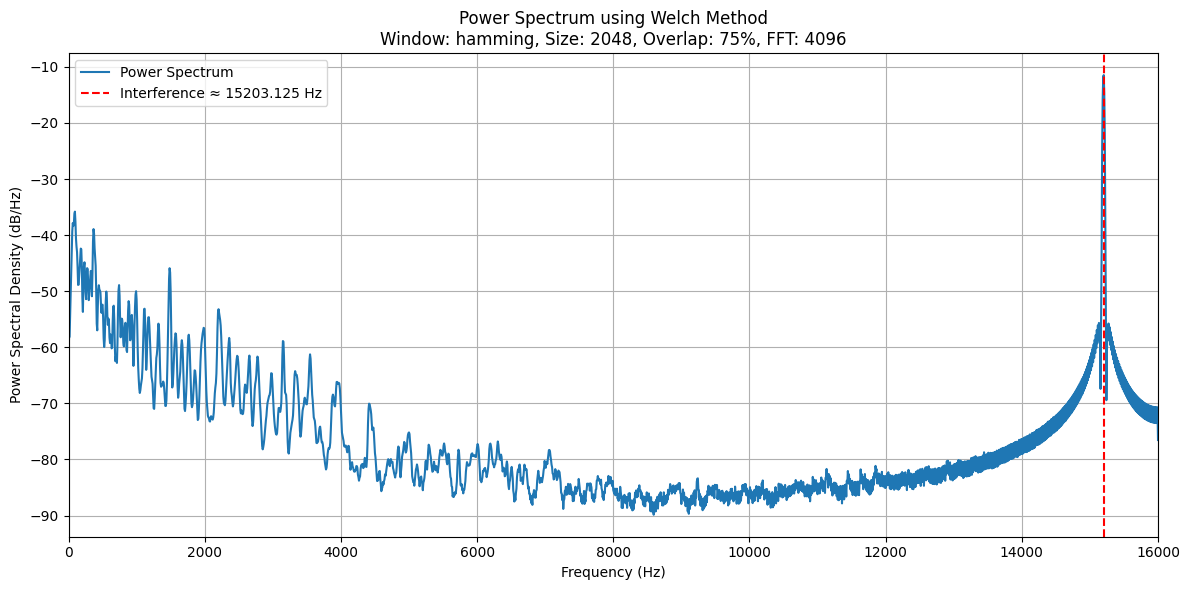

Detected interference frequency: 15203.125 Hz with power -11.465095059827261 dB


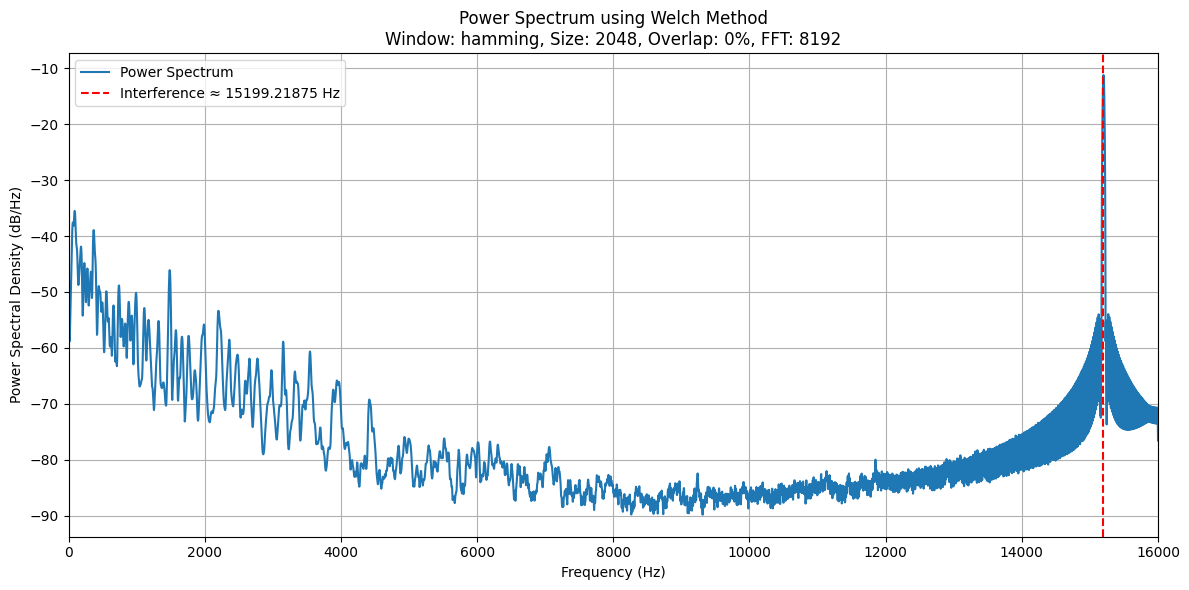

Detected interference frequency: 15199.21875 Hz with power -11.206235080123477 dB


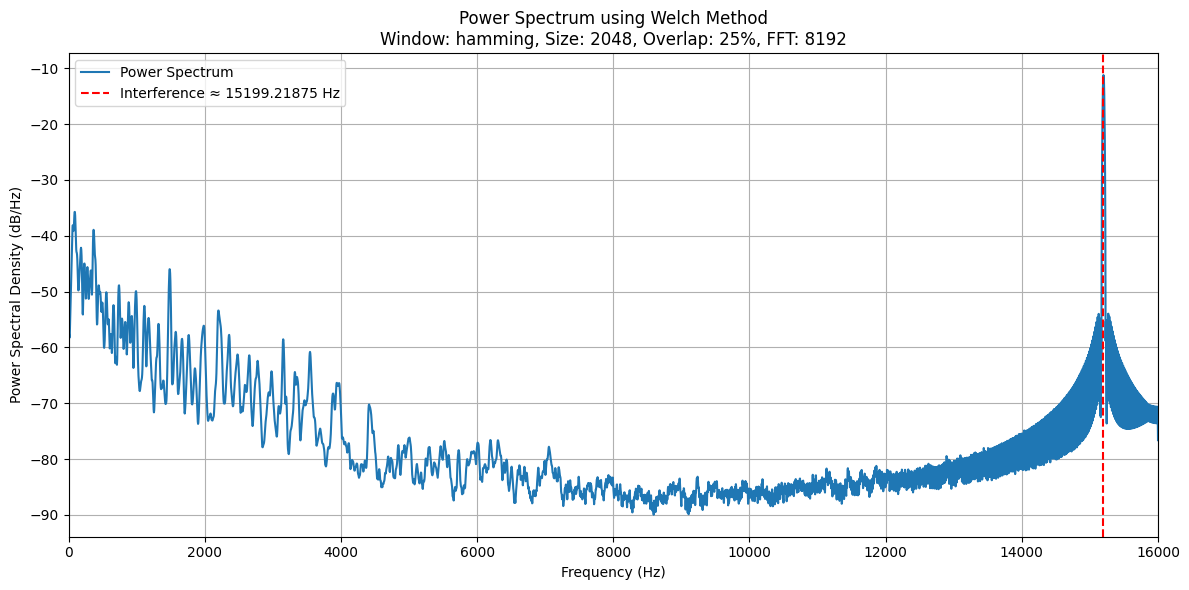

Detected interference frequency: 15199.21875 Hz with power -11.20629017856453 dB


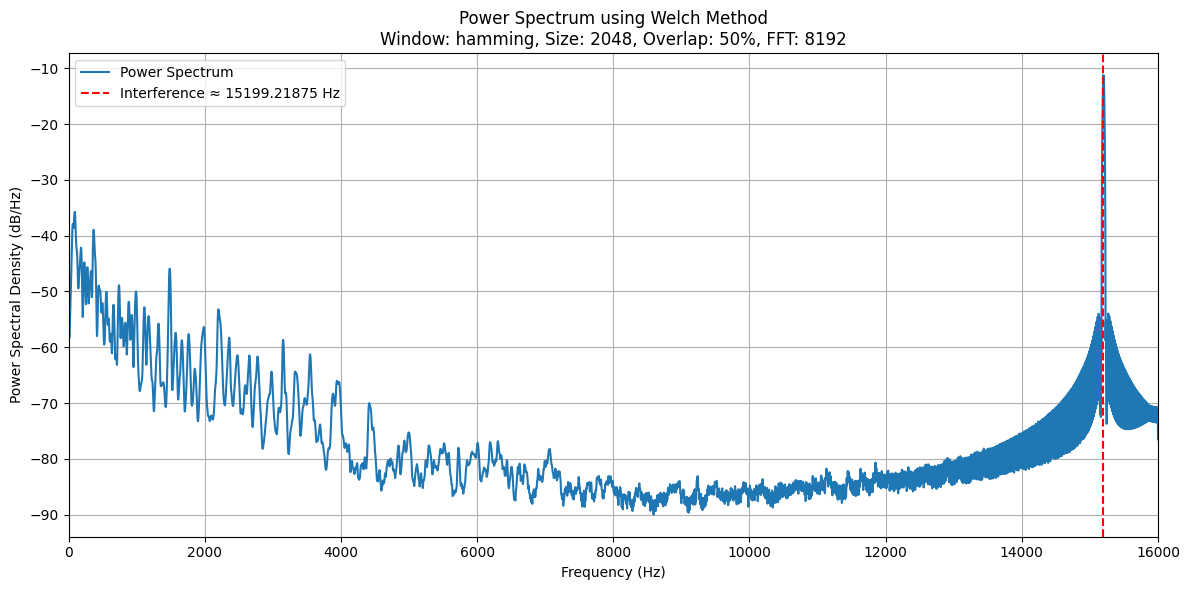

Detected interference frequency: 15199.21875 Hz with power -11.206182034745702 dB


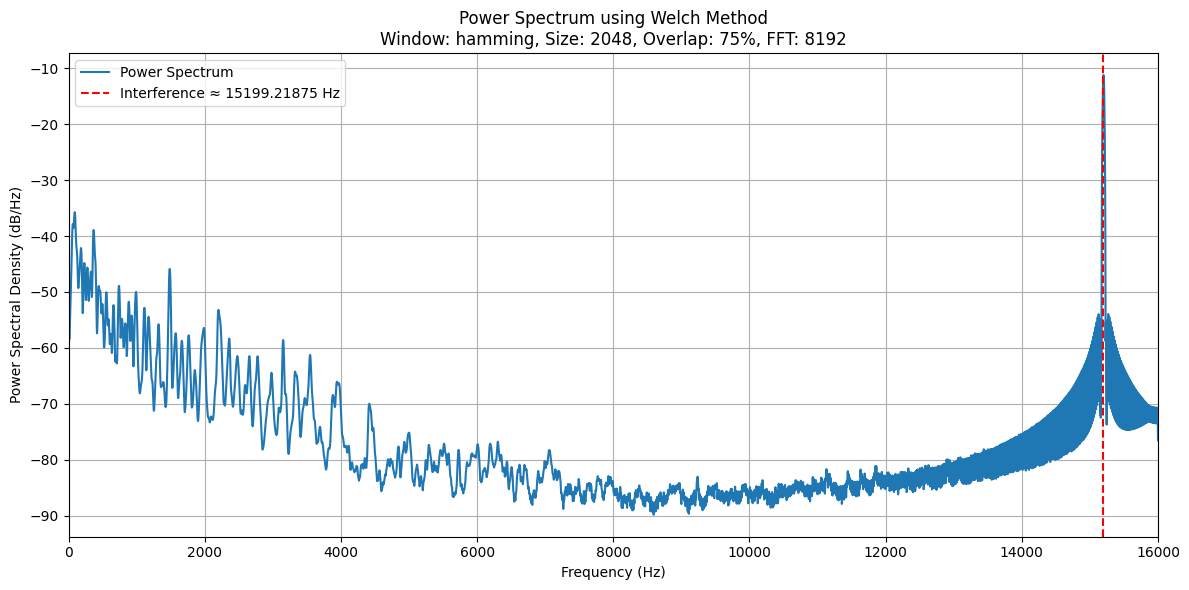

Detected interference frequency: 15199.21875 Hz with power -11.206211923300788 dB


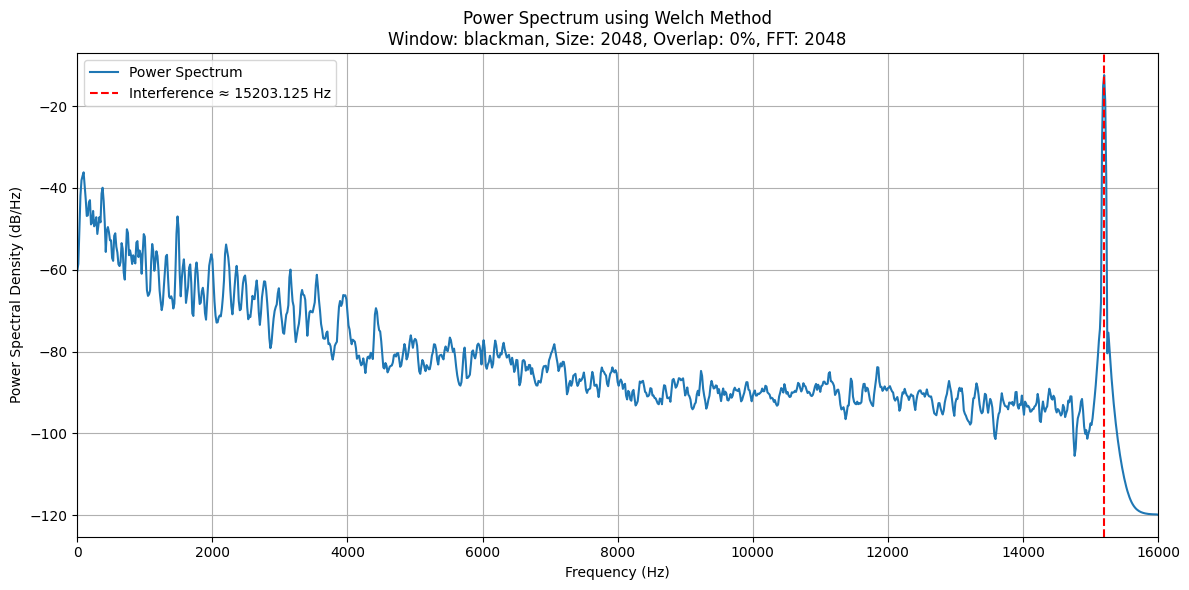

Detected interference frequency: 15203.125 Hz with power -12.3919704376358 dB


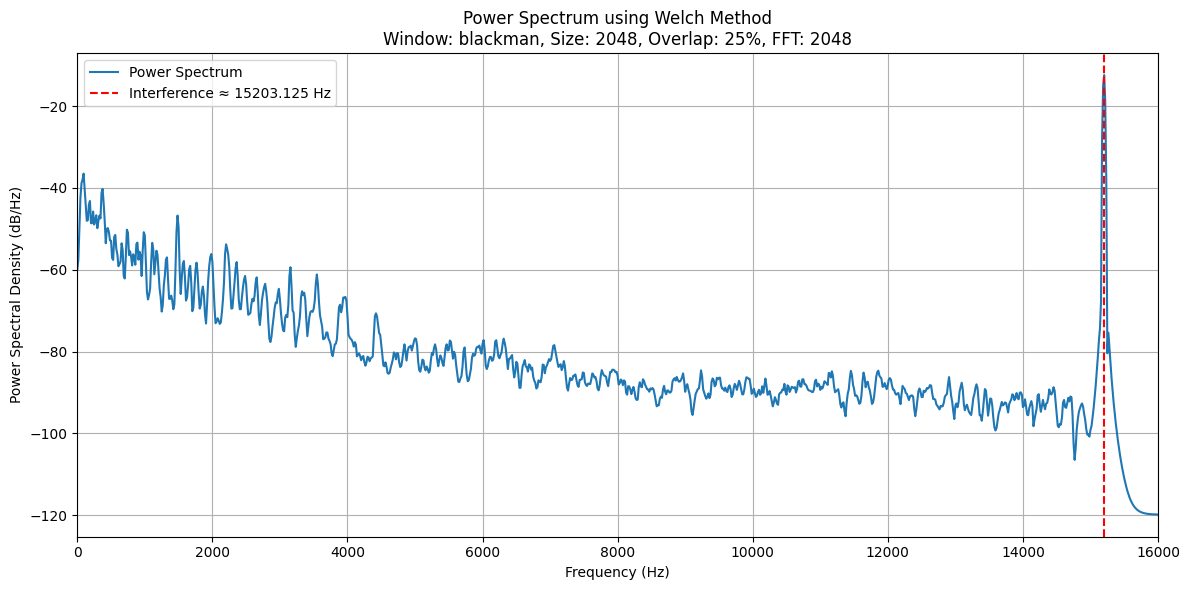

Detected interference frequency: 15203.125 Hz with power -12.391970799077182 dB


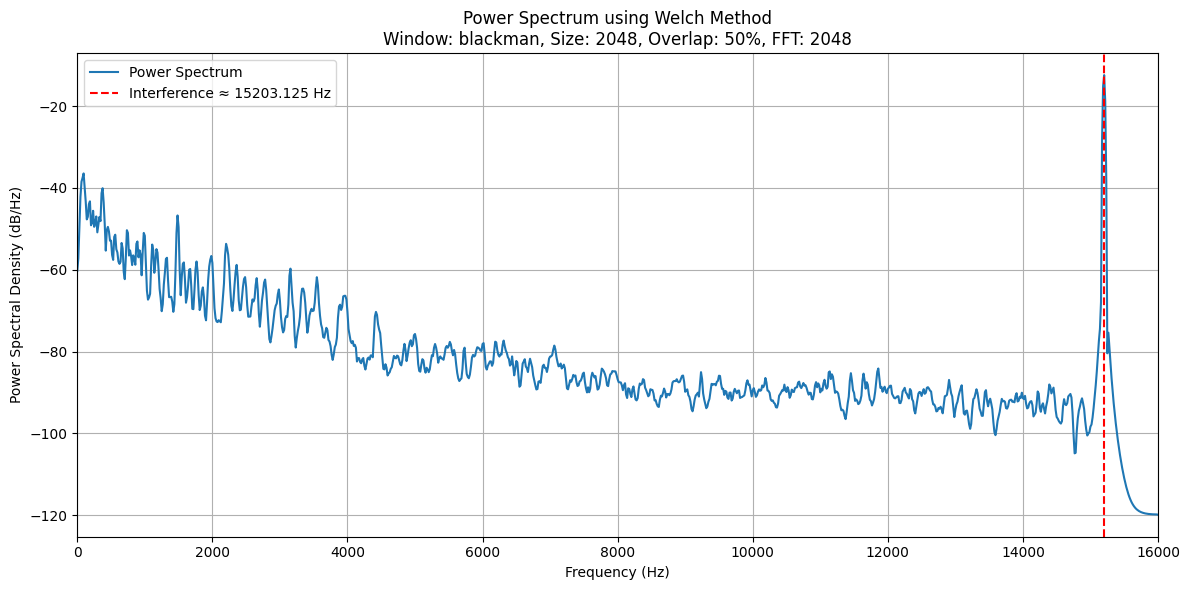

Detected interference frequency: 15203.125 Hz with power -12.391970861308375 dB


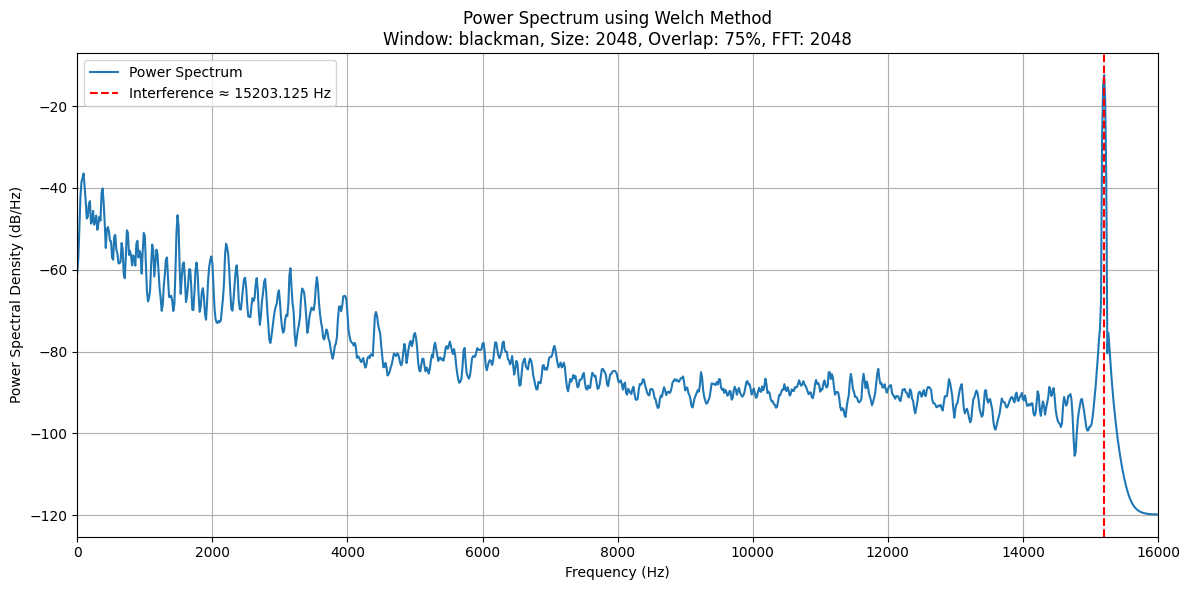

Detected interference frequency: 15203.125 Hz with power -12.391970843684884 dB


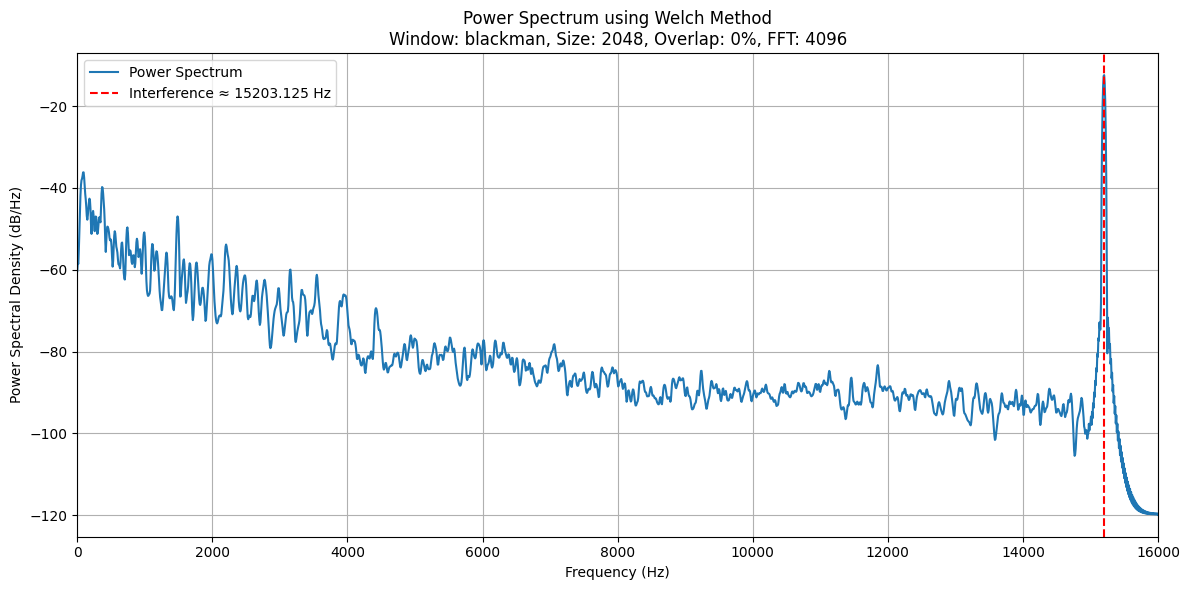

Detected interference frequency: 15203.125 Hz with power -12.3919704376358 dB


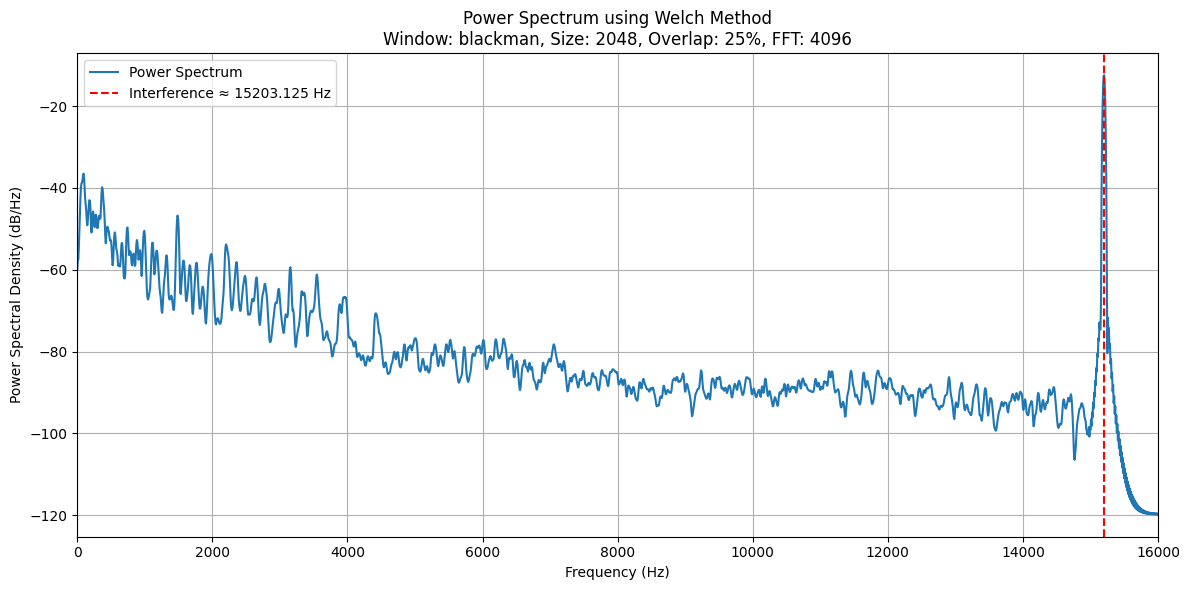

Detected interference frequency: 15203.125 Hz with power -12.391970799077182 dB


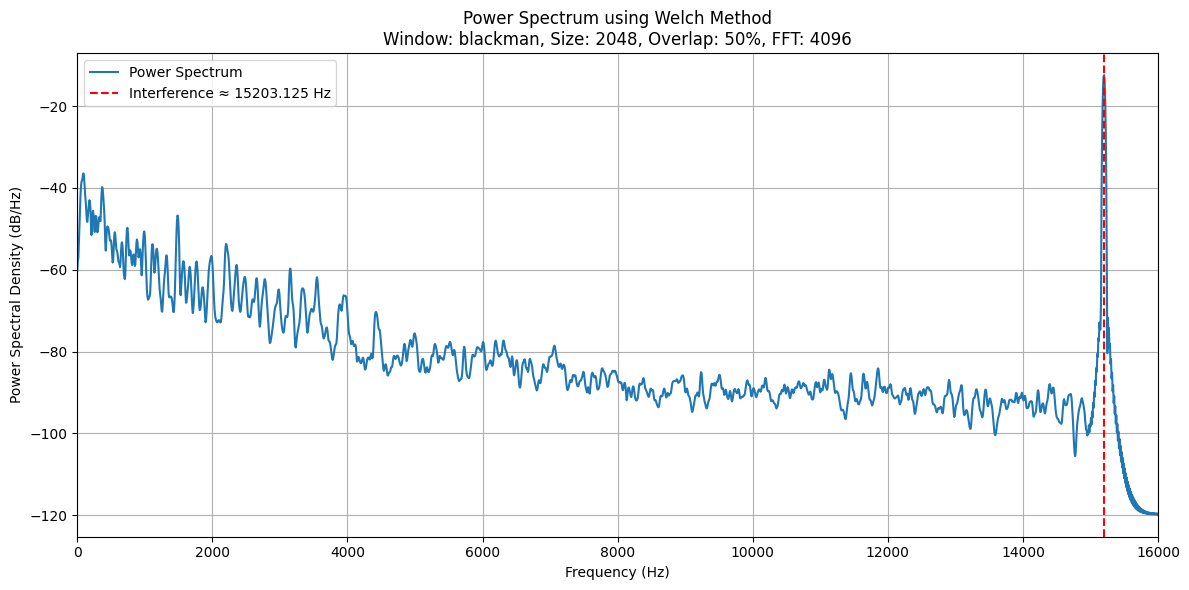

Detected interference frequency: 15203.125 Hz with power -12.391970861308375 dB


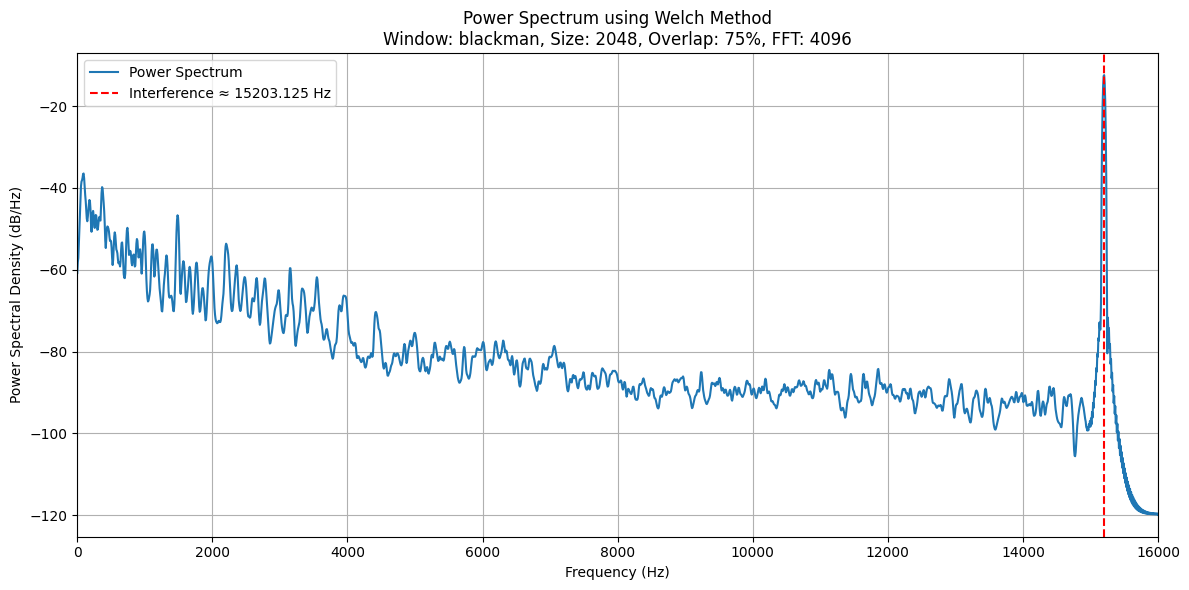

Detected interference frequency: 15203.125 Hz with power -12.391970843684884 dB


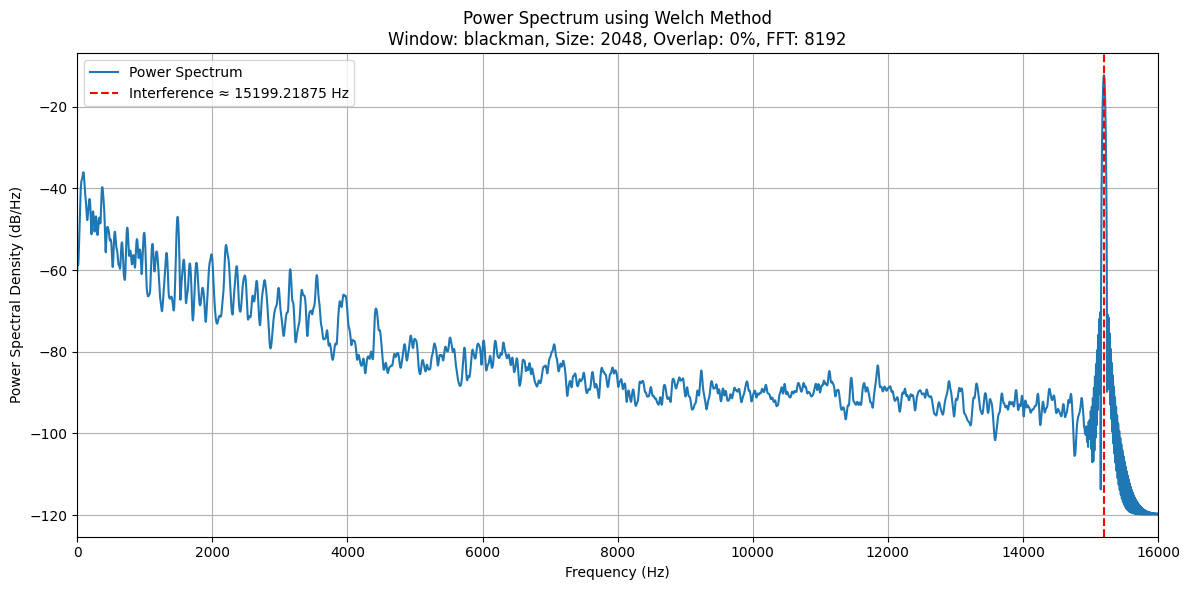

Detected interference frequency: 15199.21875 Hz with power -12.228376203234548 dB


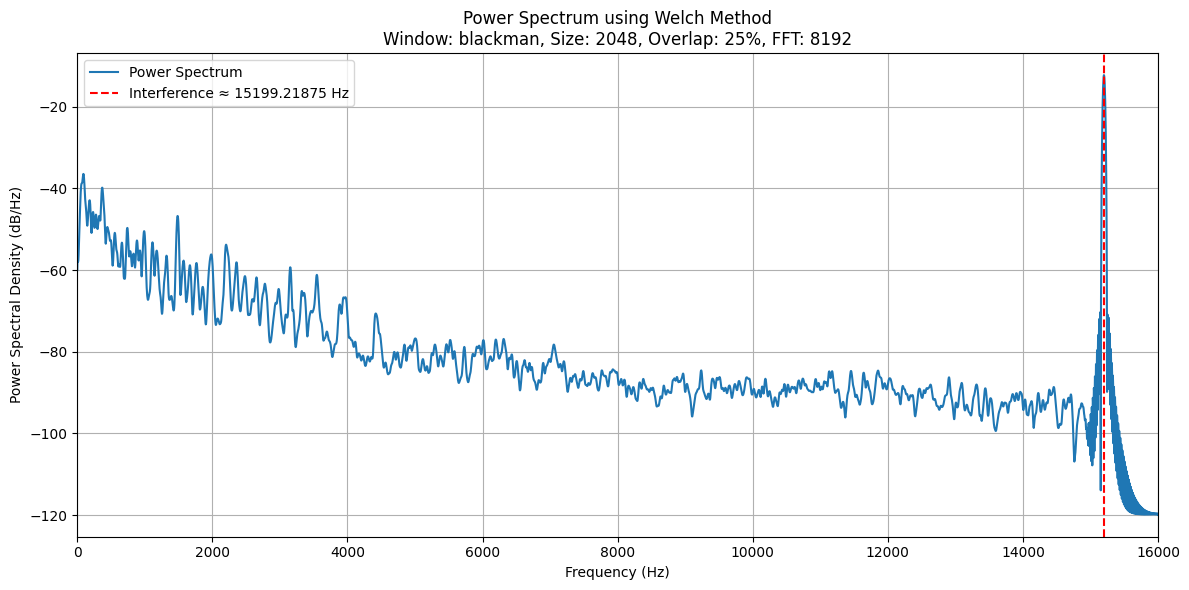

Detected interference frequency: 15199.21875 Hz with power -12.22837672362784 dB


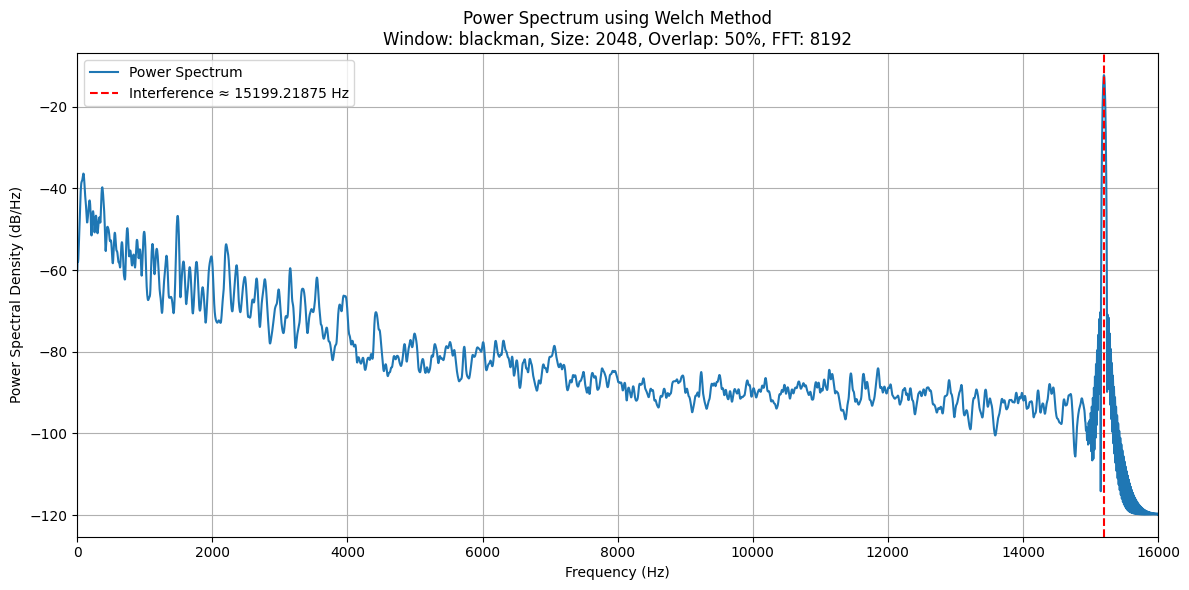

Detected interference frequency: 15199.21875 Hz with power -12.228376725933396 dB


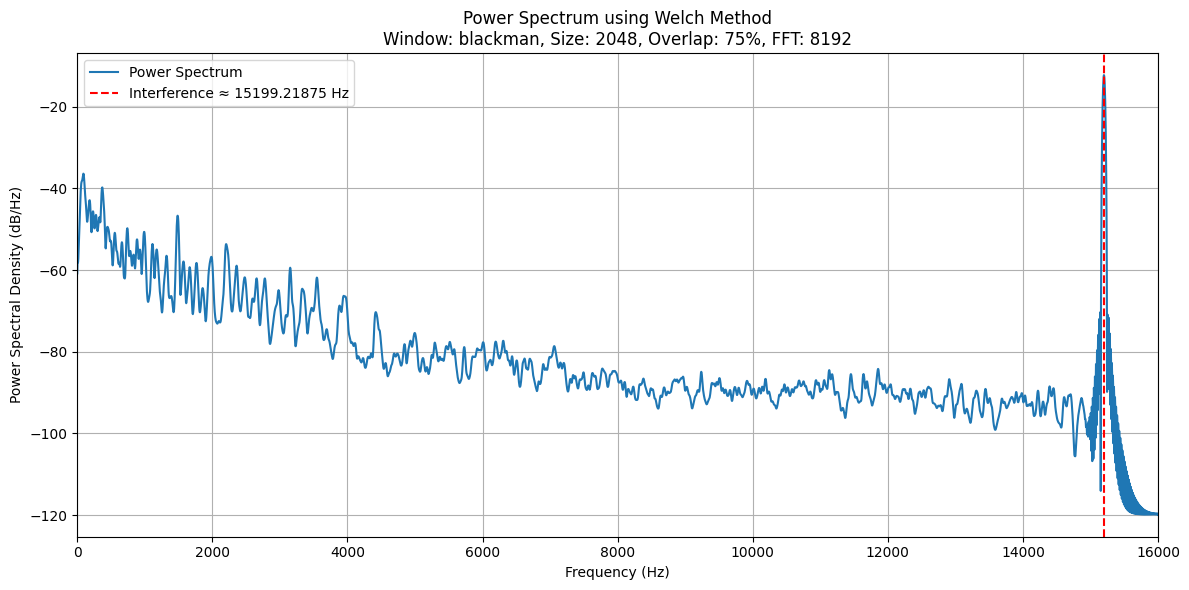

Detected interference frequency: 15199.21875 Hz with power -12.228376790781123 dB


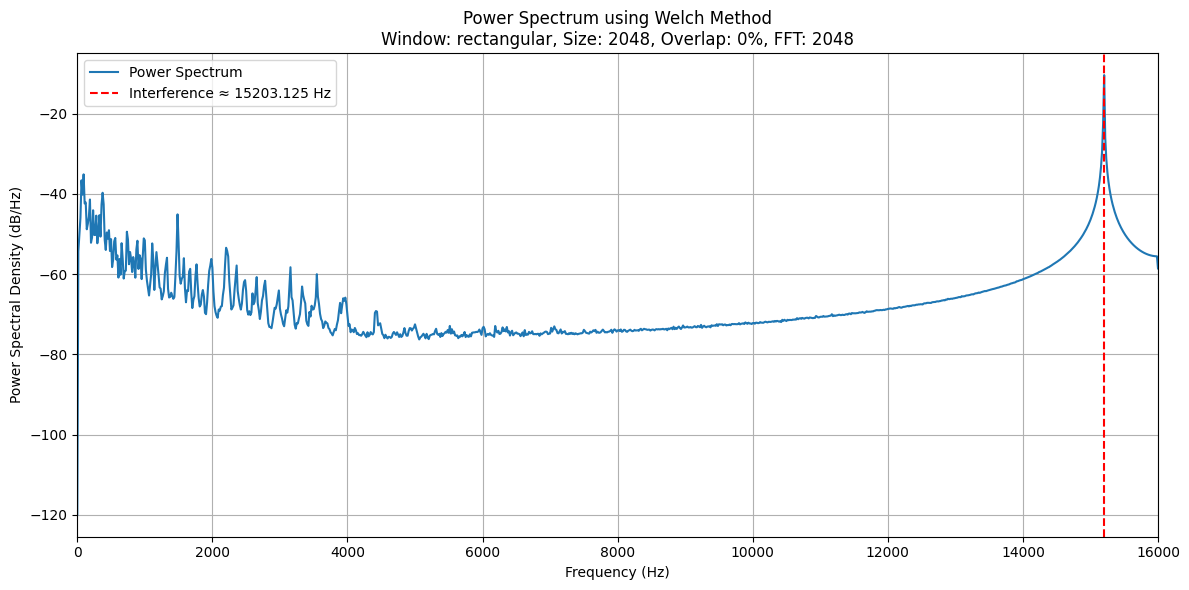

Detected interference frequency: 15203.125 Hz with power -10.422383631699898 dB


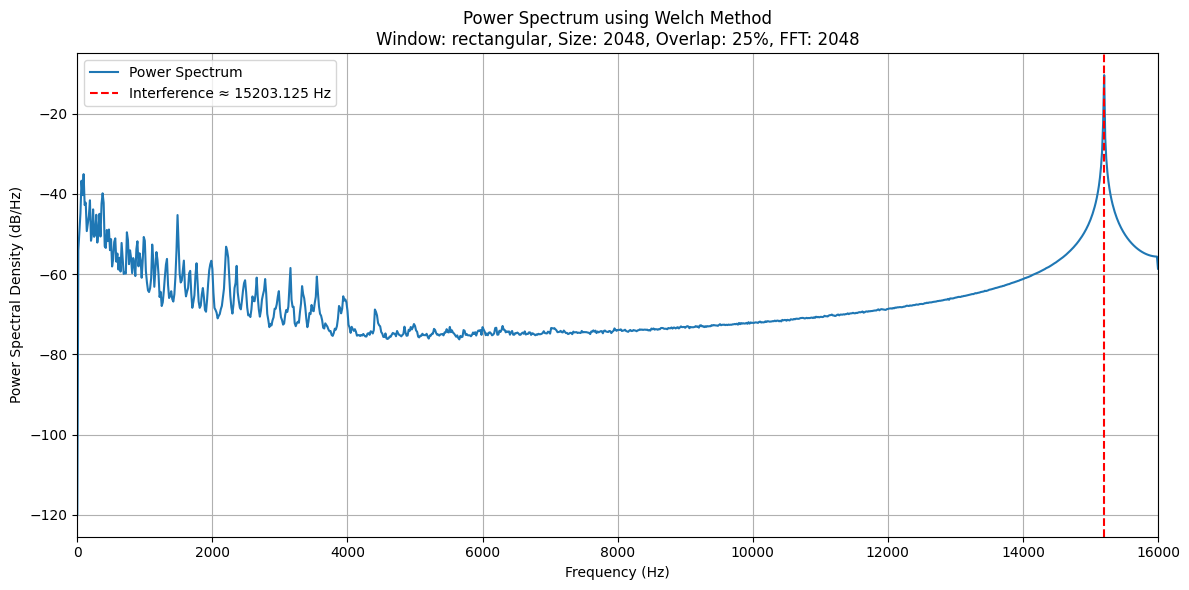

Detected interference frequency: 15203.125 Hz with power -10.422640852684598 dB


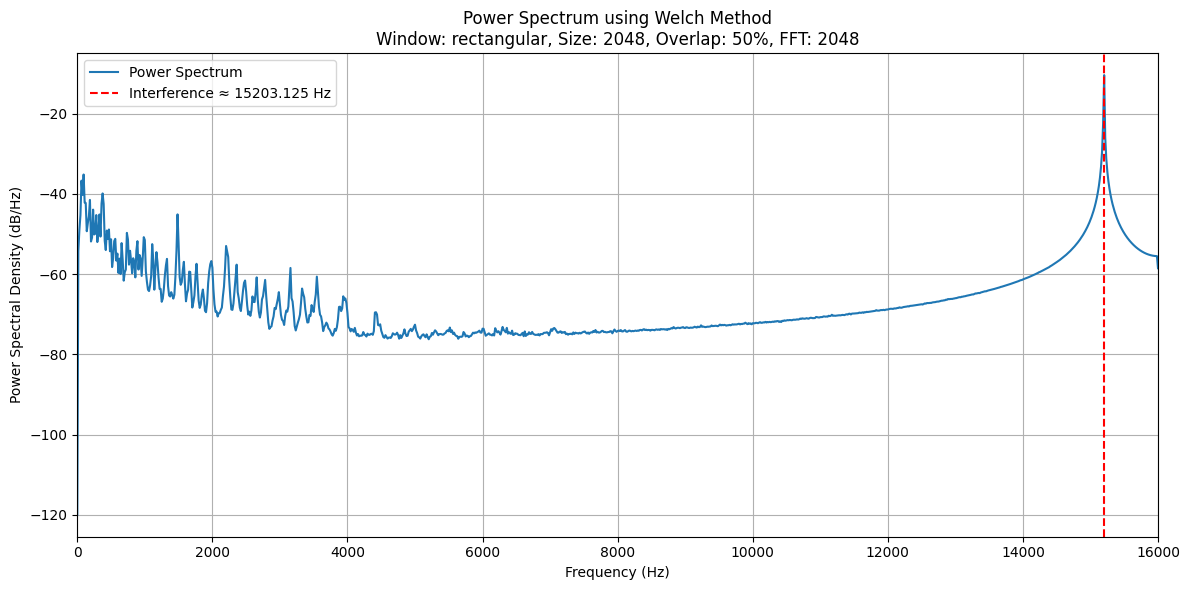

Detected interference frequency: 15203.125 Hz with power -10.422184196717872 dB


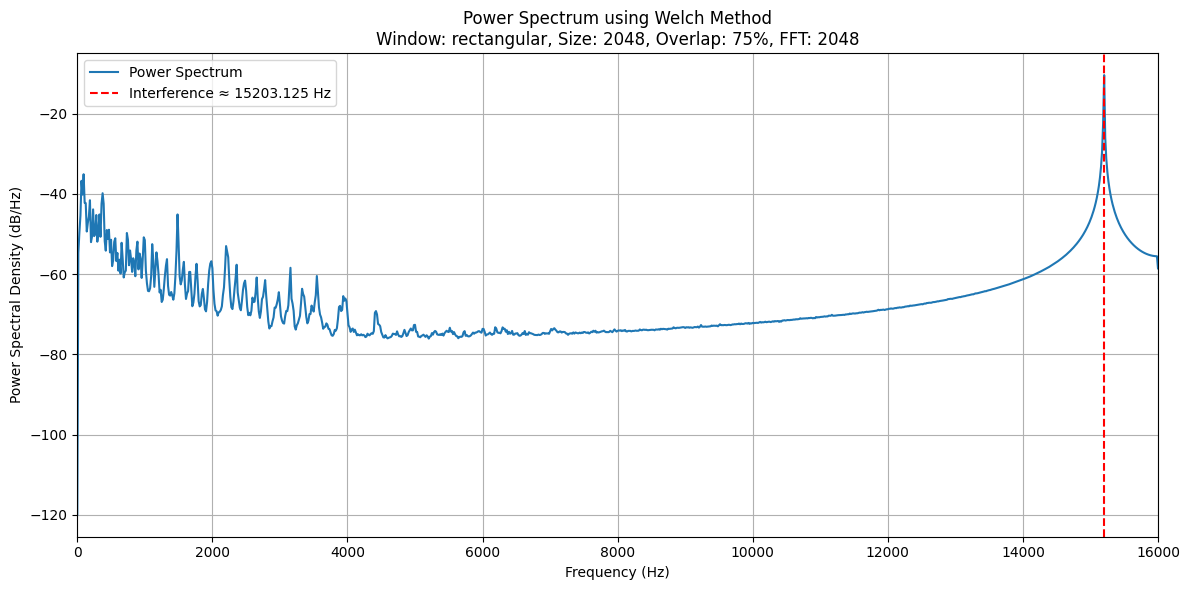

Detected interference frequency: 15203.125 Hz with power -10.422319372295906 dB


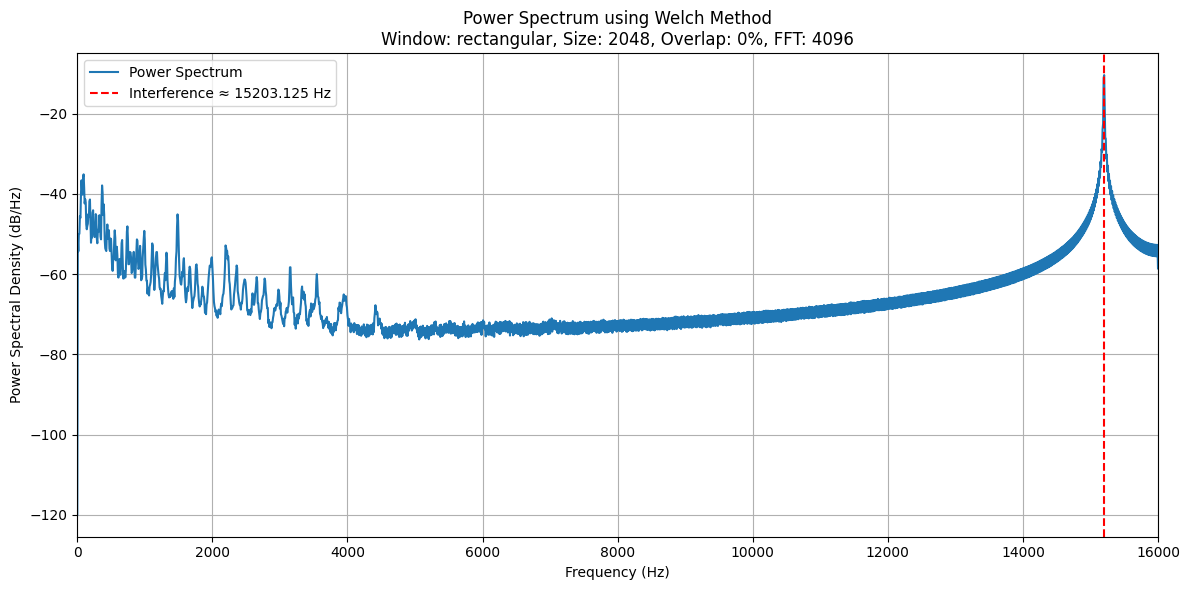

Detected interference frequency: 15203.125 Hz with power -10.422383631699898 dB


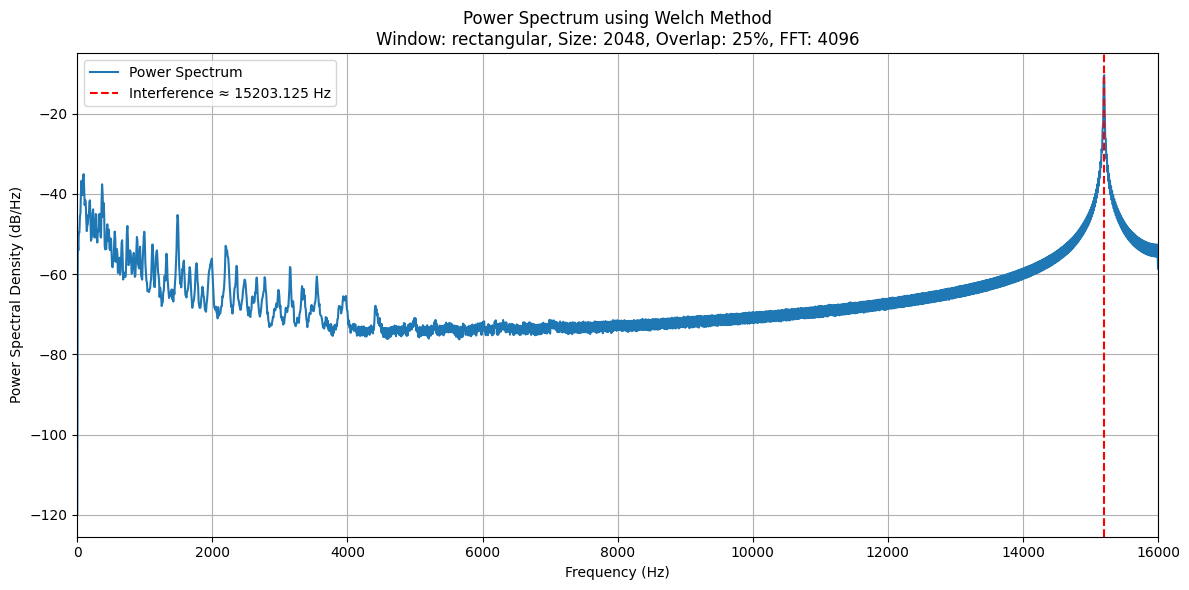

Detected interference frequency: 15203.125 Hz with power -10.422640852684598 dB


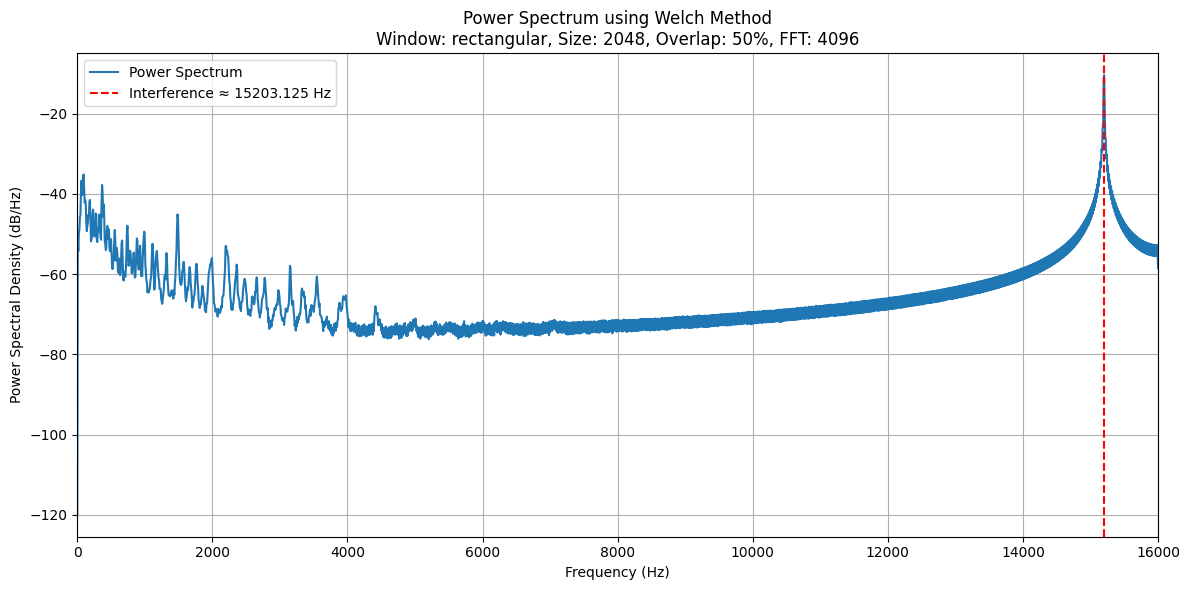

Detected interference frequency: 15203.125 Hz with power -10.422184196717872 dB


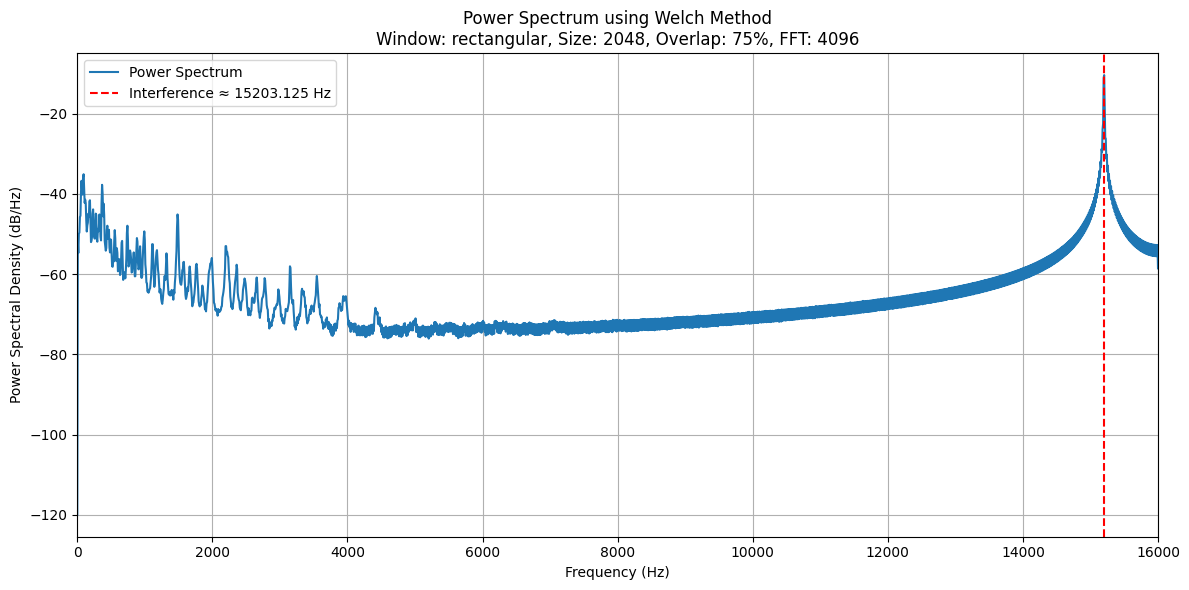

Detected interference frequency: 15203.125 Hz with power -10.422319372295906 dB


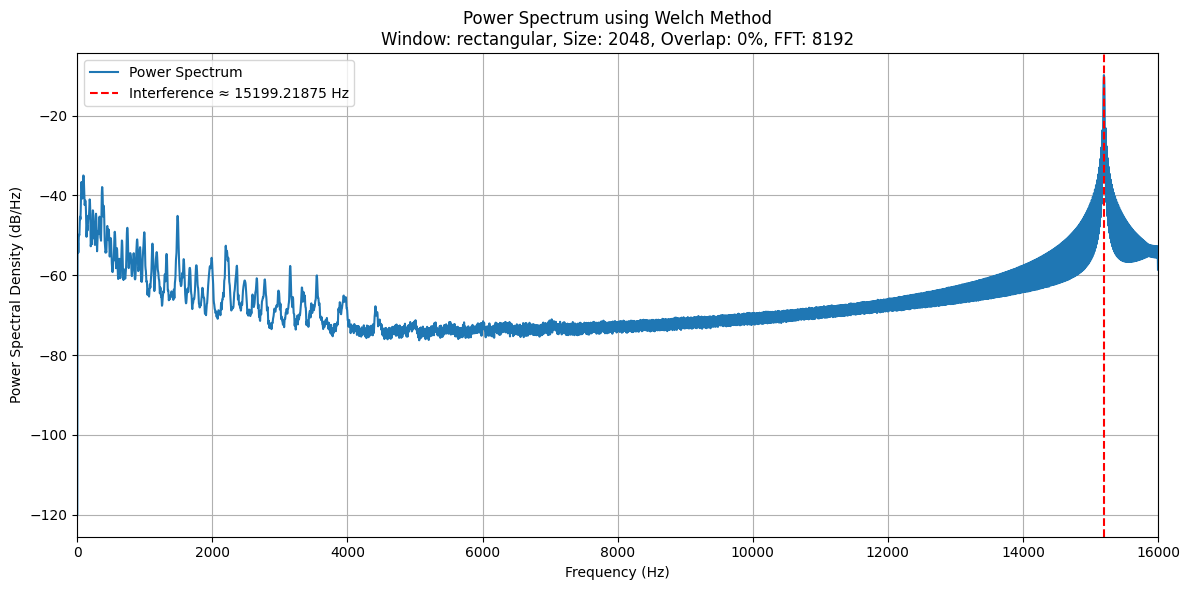

Detected interference frequency: 15199.21875 Hz with power -9.879043278397685 dB


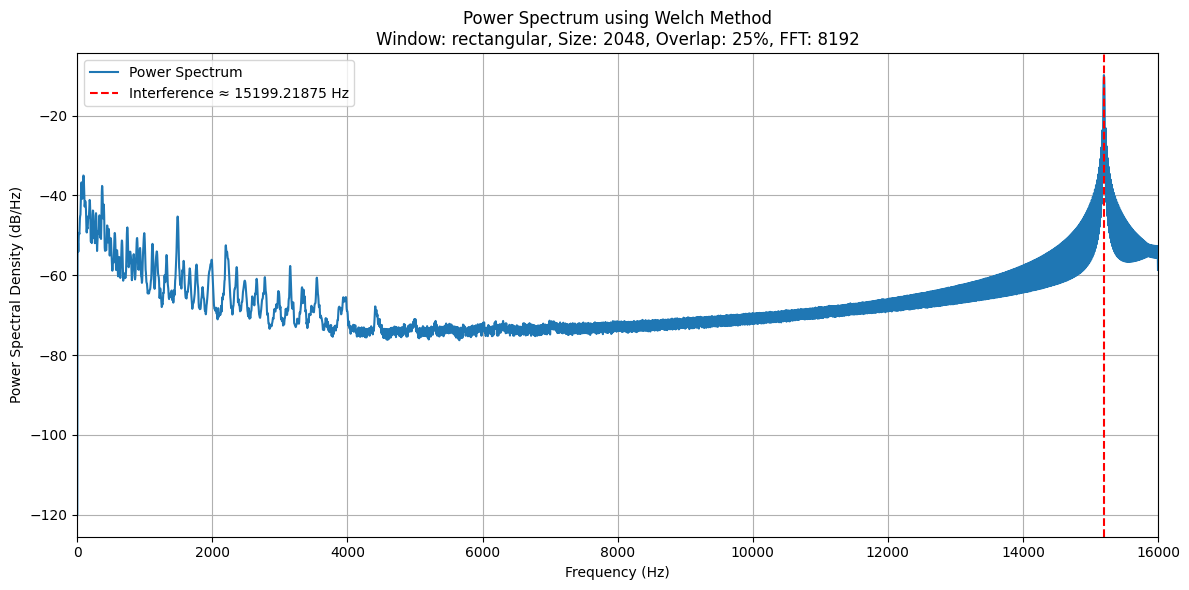

Detected interference frequency: 15199.21875 Hz with power -9.879413903661224 dB


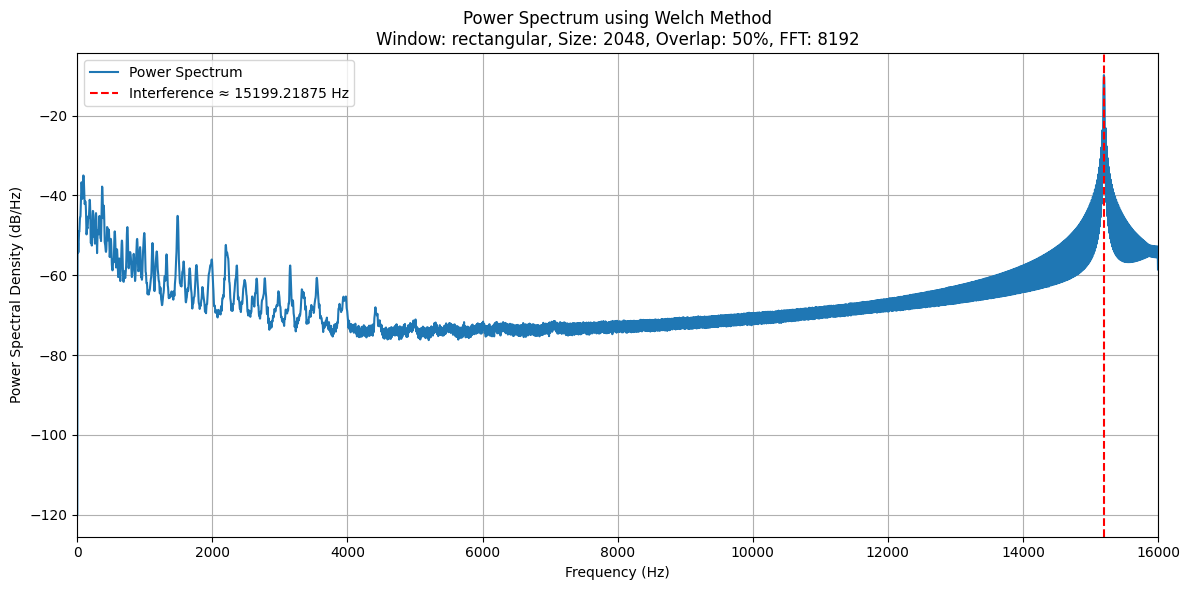

Detected interference frequency: 15199.21875 Hz with power -9.8786819921117 dB


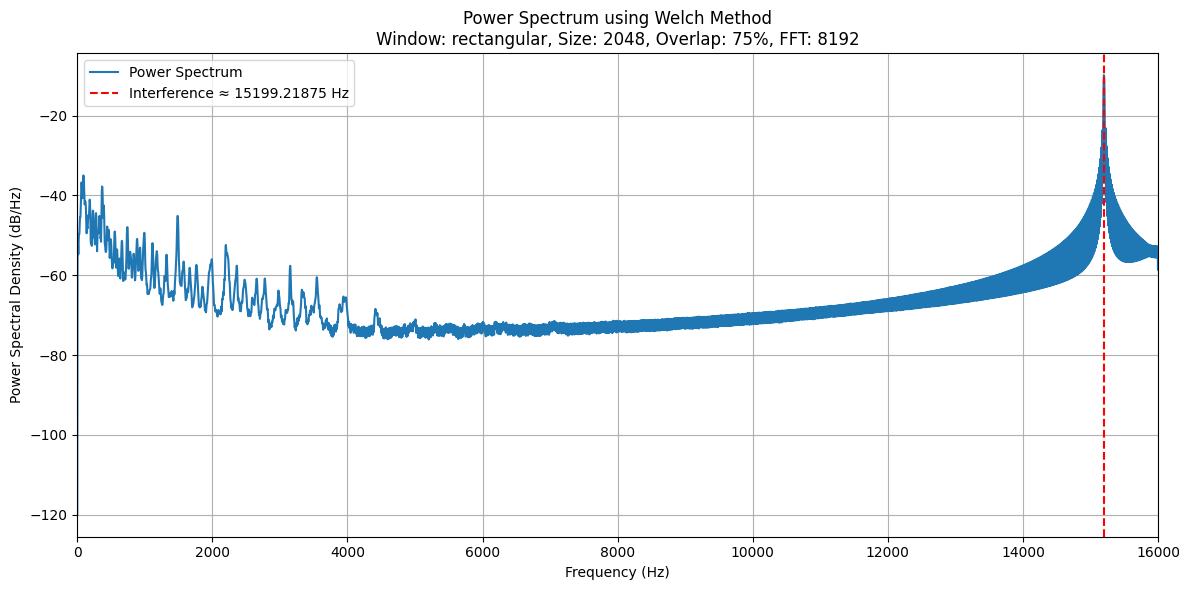

Detected interference frequency: 15199.21875 Hz with power -9.878884160513584 dB


In [46]:
for window in ['hann', 'hamming', 'blackman', 'rectangular']:
    for fft_size in  [2048, 4096,8192]:
        for overlap_percentage in [0, 25, 50, 75]:
            plot_welch_spectrum(new_segment, fs, fft_size, window_size, window, overlap_percentage)

# Part 2


# 2.1- Defining the digital filtering problem

`We need to remove the intereference at 15.2 kHz and not to lose the initial quality of the audio as much as can be. Annoying high-frequency is appearing through the recording due to the interference.`


# 2.2- Defining the constraints of the filter

`1. The order of a filter should be low enough (≤ 50) so as not to increase processing delay and computational complexity much.`

`2. A filter should ensure minimal group delay and thus be able to process quickly enough to be real time.`

`3. Implementing a filter must be memory-efficient in order to be suitable for low-power systems.`


# 2.3- Determining the specifications of the digital filter

- `cutoff` = interference_f * 0.9
- `Passband` = 13000
- `Passband ripple` = 1
- `Stopband attenuation` = 40


# 2.4- Designing the filter

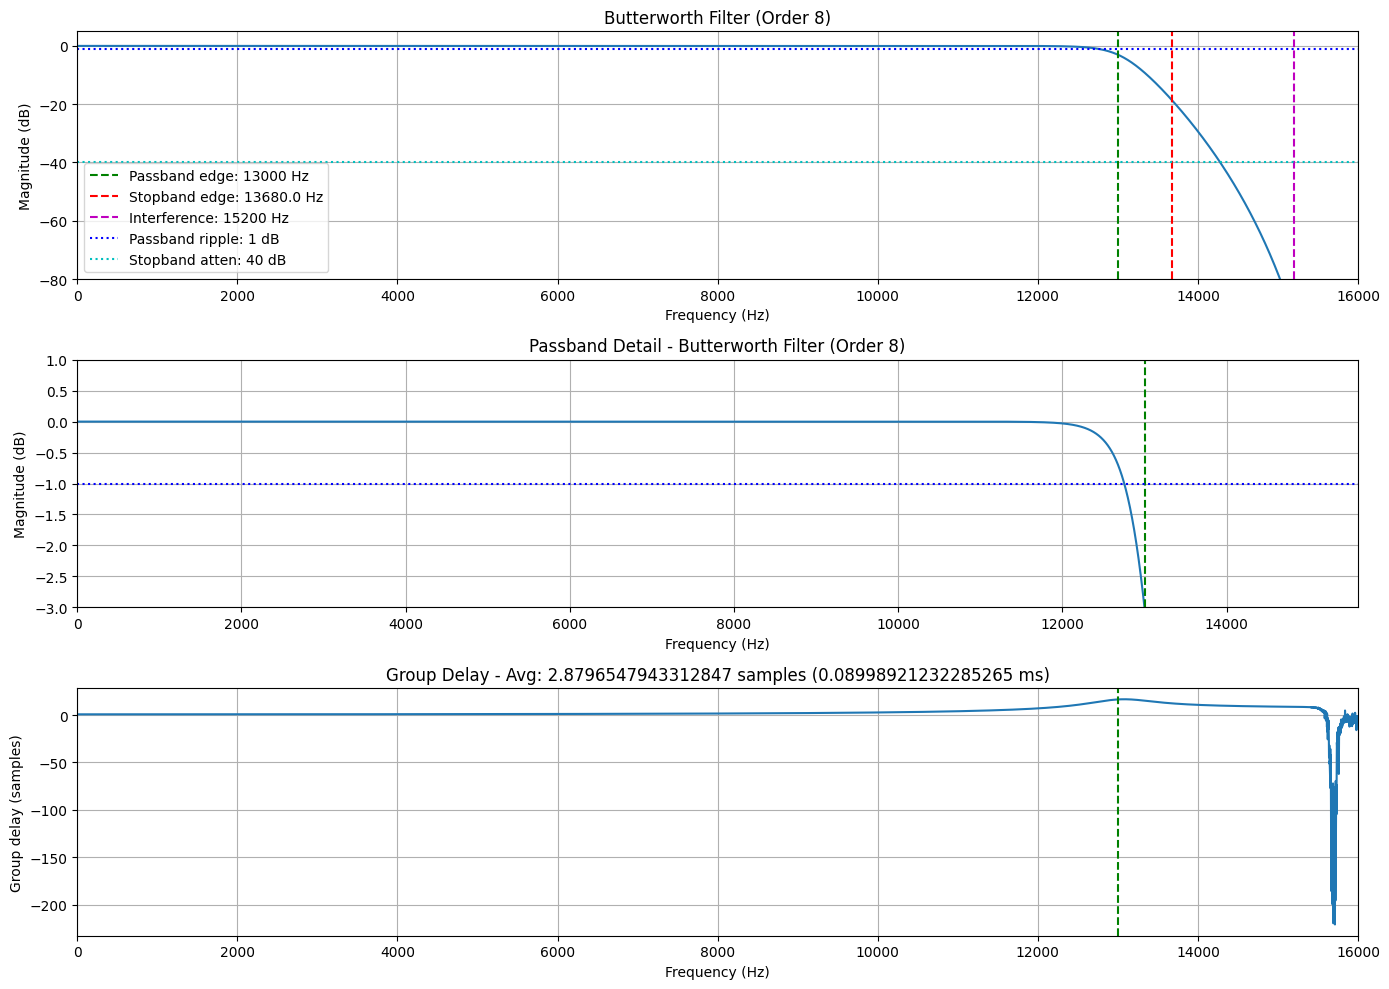

Filter coefficients for Butterworth Filter (Order 8):
Numerator coefficients (b): 9
Denominator coefficients (a): 9
Average group delay: 2.8796547943312847 samples (0.08998921232285265 ms)


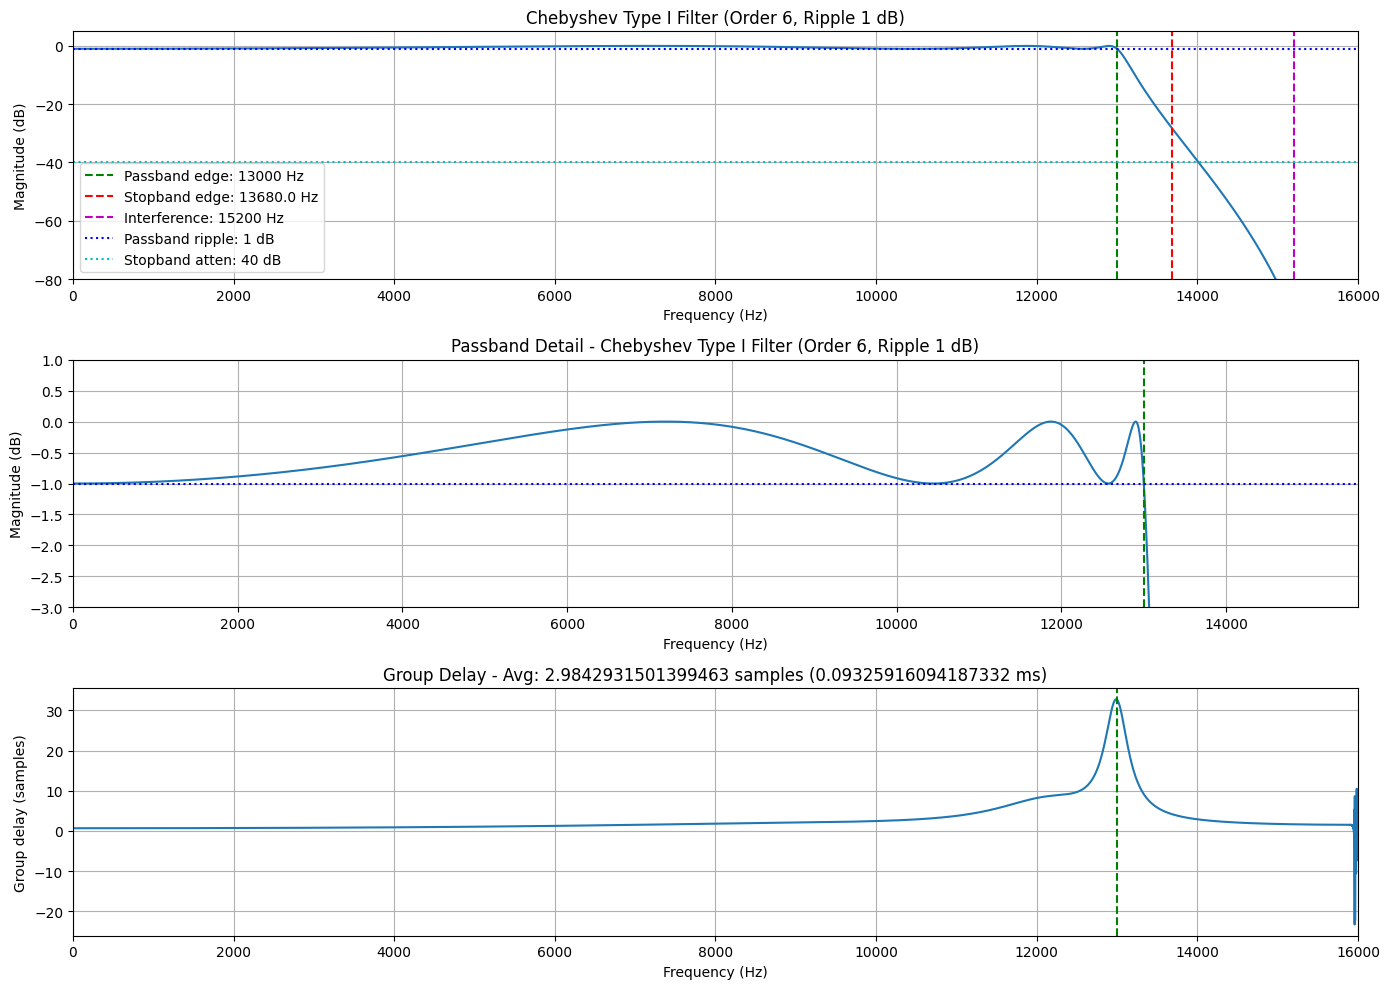

Filter coefficients for Chebyshev Type I Filter (Order 6, Ripple 1 dB):
Numerator coefficients (b): 7
Denominator coefficients (a): 7
Average group delay: 2.9842931501399463 samples (0.09325916094187332 ms)


c:\Users\ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\filter_design.py:474: RuntimeWarning: divide by zero encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /
c:\Users\ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\filter_design.py:474: RuntimeWarning: invalid value encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /
c:\Users\ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\filter_design.py:688: UserWarning: The group delay is singular at frequencies [0.000, 0.000, 0.001, 0.001, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.004, 0.004, 0.005, 0.005, 0.005, 0.006, 0.006, 0.007, 0.007, 0.007, 0.008, 0.008, 0.009, 0.009, 0.009, 0.010, 0.010, 0.011, 0.011, 0.011, 0.012, 0.012, 0.013, 0.013, 0.013, 0.014, 0.014, 0.015, 0.015, 0.015, 0.016, 0.016, 0.016, 0.017, 0.017, 0.018, 0.018, 0.018, 0.019, 0.019, 0.020, 0.020, 0.020, 0.021, 0.021, 0.022, 0.022, 0.022, 0.023, 0.023, 0

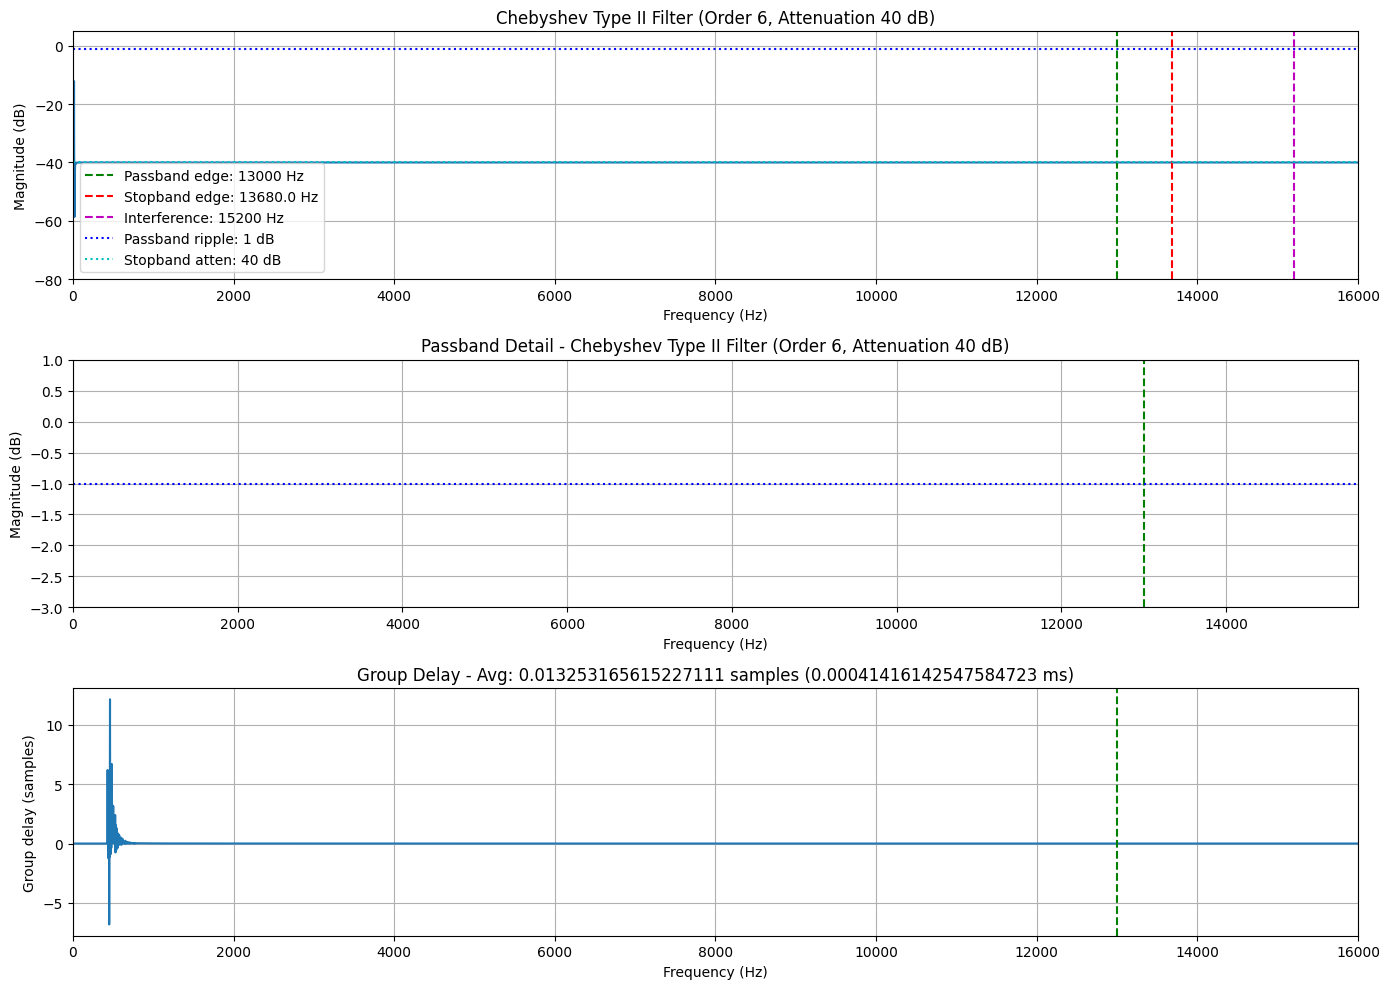

Filter coefficients for Chebyshev Type II Filter (Order 6, Attenuation 40 dB):
Numerator coefficients (b): 7
Denominator coefficients (a): 7
Average group delay: 0.013253165615227111 samples (0.00041416142547584723 ms)


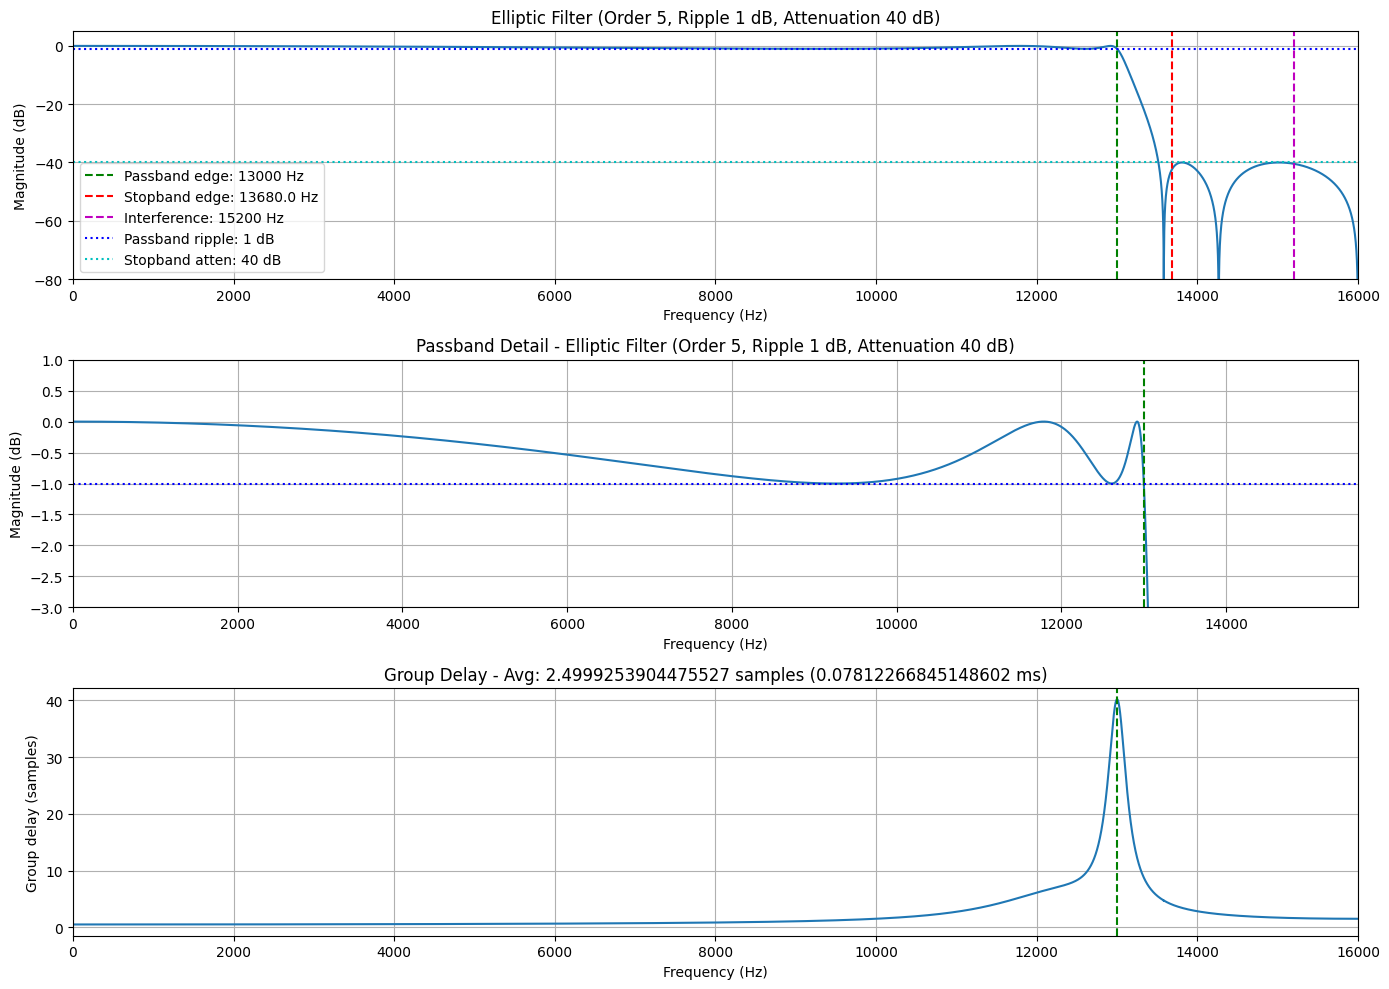

Filter coefficients for Elliptic Filter (Order 5, Ripple 1 dB, Attenuation 40 dB):
Numerator coefficients (b): 6
Denominator coefficients (a): 6
Average group delay: 2.4999253904475527 samples (0.07812266845148602 ms)


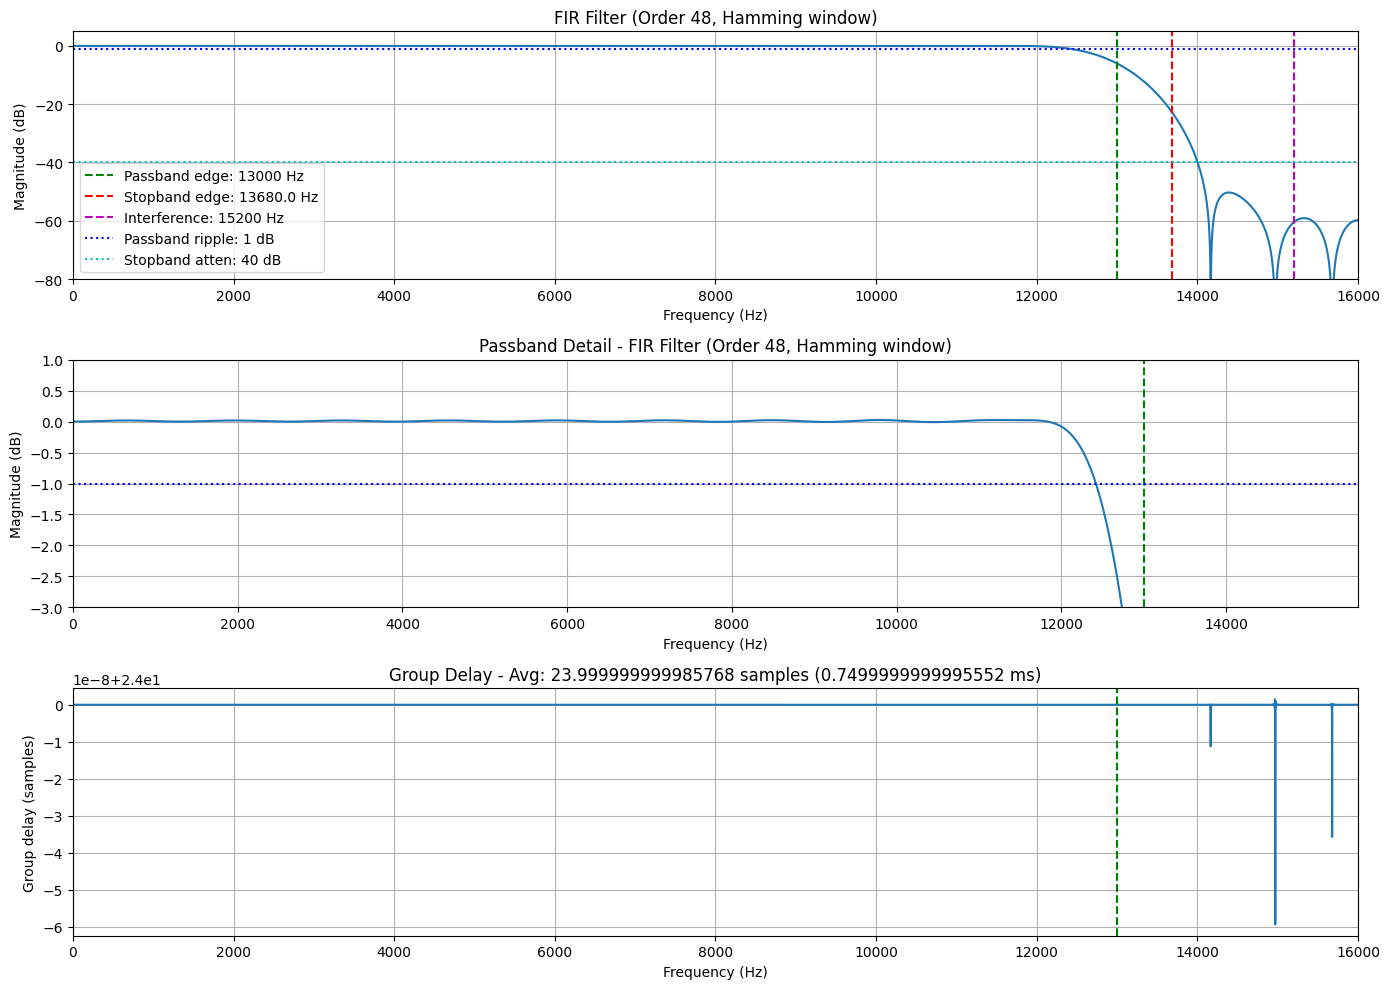

Filter coefficients for FIR Filter (Order 48, Hamming window):
Numerator coefficients (b): 49
Denominator coefficients (a): 1
Average group delay: 23.999999999985768 samples (0.7499999999995552 ms)


[{'type': 'butter',
  'order': 8,
  'avg_delay_ms': 0.08998921232285265,
  'passband_deviation': 2.985818437692689,
  'stopband_rejection': 282.9980324774167,
  'num_coefficients': 17,
  'b': array([ 0.21465103,  1.71720822,  6.01022877, 12.02045754, 15.02557193,
         12.02045754,  6.01022877,  1.71720822,  0.21465103]),
  'a': array([ 1.        ,  4.98494257, 11.26104528, 14.94636759, 12.68998226,
          7.03453195,  2.48019889,  0.50751947,  0.04607506])},
 {'type': 'cheby1',
  'order': 6,
  'avg_delay_ms': 0.09325916094187332,
  'passband_deviation': 1.0000000000000029,
  'stopband_rejection': 309.48086075195306,
  'num_coefficients': 13,
  'b': array([0.20364832, 1.22188989, 3.05472473, 4.0729663 , 3.05472473,
         1.22188989, 0.20364832]),
  'a': array([1.        , 3.02426256, 4.37555234, 3.5886063 , 1.87518563,
         0.61635991, 0.14385201])},
 {'type': 'cheby2',
  'order': 6,
  'avg_delay_ms': 0.00041416142547584723,
  'passband_deviation': inf,
  'stopband_rejecti

In [47]:
passband_edge = 13000
stopband_edge = interference_f *0.9
passband_ripple = 1
stopband_atten = 40
nyquist_freq = fs/2
def design_and_plot_filter(filter_type, order=None, cutoff=None, ripple=None, attenuation=None):
    # Normalizing frequency to Nyquist
    if isinstance(cutoff, (list, tuple)):
        normalized_cutoff = [freq / nyquist_freq for freq in cutoff]
    else:
        normalized_cutoff = cutoff / nyquist_freq

    # Filter design
    if filter_type == 'butter':
        b, a = signal.butter(order, normalized_cutoff, btype='low')
        title = f"Butterworth Filter (Order {order})"
    elif filter_type == 'cheby1':
        b, a = signal.cheby1(order, ripple, normalized_cutoff, btype='low')
        title = f"Chebyshev Type I Filter (Order {order}, Ripple {ripple} dB)"
    elif filter_type == 'cheby2':
        b, a = signal.cheby2(order, attenuation, normalized_cutoff, btype='low')
        title = f"Chebyshev Type II Filter (Order {order}, Attenuation {attenuation} dB)"
    elif filter_type == 'ellip':
        b, a = signal.ellip(order, ripple, attenuation, normalized_cutoff, btype='low')
        title = f"Elliptic Filter (Order {order}, Ripple {ripple} dB, Attenuation {attenuation} dB)"
    elif filter_type == 'fir':
        b = signal.firwin(order + 1, normalized_cutoff, window='hamming')
        a = [1.0]
        title = f"FIR Filter (Order {order}, Hamming window)"
    else:
        raise ValueError(f"Unknown filter type: {filter_type}")

    # Frequency response
    w, h = signal.freqz(b, a, worN=8000)
    w_hz = w * fs / (2 * np.pi)

    # Group delay
    w_gd, gd = signal.group_delay((b, a), w=8000)
    w_gd_hz = w_gd * fs / (2 * np.pi)
    avg_delay_samples = np.mean(gd)
    avg_delay_ms = (avg_delay_samples / fs) * 1000

    # Plotting
    plt.figure(figsize=(14, 10))

    # Magnitude response
    plt.subplot(3, 1, 1)
    plt.plot(w_hz, 20 * np.log10(abs(h)))
    plt.axvline(x=passband_edge, color='g', linestyle='--', label=f'Passband edge: {passband_edge} Hz')
    plt.axvline(x=stopband_edge, color='r', linestyle='--', label=f'Stopband edge: {stopband_edge} Hz')
    plt.axvline(x=interference_f, color='m', linestyle='--', label=f'Interference: {interference_f} Hz')
    plt.axhline(y=-passband_ripple, color='b', linestyle=':', label=f'Passband ripple: {passband_ripple} dB')
    plt.axhline(y=-stopband_atten, color='c', linestyle=':', label=f'Stopband atten: {stopband_atten} dB')
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.xlim(0, fs / 2)
    plt.ylim(-80, 5)

    # Passband detail
    plt.subplot(3, 1, 2)
    plt.plot(w_hz, 20 * np.log10(abs(h)))
    plt.axvline(x=passband_edge, color='g', linestyle='--')
    plt.axhline(y=-passband_ripple, color='b', linestyle=':')
    plt.title(f'Passband Detail - {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim(0, passband_edge * 1.2)
    plt.ylim(-3, 1)

    # Group delay plot
    plt.subplot(3, 1, 3)
    plt.plot(w_gd_hz, gd)
    plt.axvline(x=passband_edge, color='g', linestyle='--')
    plt.title(f'Group Delay - Avg: {avg_delay_samples} samples ({avg_delay_ms} ms)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Group delay (samples)')
    plt.grid(True)
    plt.xlim(0, fs / 2)

    plt.tight_layout()
    plt.show()

    # Metrics
    print(f"Filter coefficients for {title}:")
    print(f"Numerator coefficients (b): {len(b)}")
    print(f"Denominator coefficients (a): {len(a)}")
    print(f"Average group delay: {avg_delay_samples} samples ({avg_delay_ms} ms)")

    stopband_vals = 20 * np.log10(abs(h[w_hz > stopband_edge]))
    stopband_rejection = -np.min(stopband_vals) if stopband_vals.size > 0 else 0

    metrics = {
        'type': filter_type,
        'order': order,
        'avg_delay_ms': avg_delay_ms,
        'passband_deviation': np.max(np.abs(20 * np.log10(abs(h[w_hz < passband_edge])))),
        'stopband_rejection': stopband_rejection,
        'num_coefficients': len(b) + len(a) - 1,
        'b': b,
        'a': a
    }

    return metrics

# Design filters and collect metrics
filter_designs = []
butter_metrics = design_and_plot_filter('butter', order=8, cutoff=passband_edge)
cheby1_metrics = design_and_plot_filter('cheby1', order=6, cutoff=passband_edge, ripple=passband_ripple)
normalized_stopband_edge = stopband_edge / nyquist_freq
cheby2_metrics = design_and_plot_filter('cheby2', order=6, cutoff=normalized_stopband_edge, attenuation=stopband_atten)
ellip_metrics = design_and_plot_filter('ellip', order=5, cutoff=passband_edge, ripple=passband_ripple, attenuation=stopband_atten)
fir_metrics = design_and_plot_filter('fir', order=48, cutoff=passband_edge)

filter_designs.extend([butter_metrics, cheby1_metrics, cheby2_metrics, ellip_metrics, fir_metrics])

filter_designs


# 2.5- Decision analysis to compare the different digital filters.

In [48]:
# defining the criteria for decision matrix
criteria = {
    'Passband Flatness': {'weight': 0.25, 'higher_is_better': False},
    'Stopband Rejection': {'weight': 0.25, 'higher_is_better': True},
    'Group Delay': {'weight': 0.20, 'higher_is_better': False},
    'Computational Complexity': {'weight': 0.15, 'higher_is_better': False},
    'Implementation Simplicity': {'weight': 0.15, 'higher_is_better': True}
}
# Ensuring that all passband deviations are finite 
finite_flatness = [f['passband_deviation'] for f in filter_designs if np.isfinite(f['passband_deviation'])]
max_finite_flatness = max(finite_flatness)
adjusted_flatness = [
    f['passband_deviation'] if np.isfinite(f['passband_deviation']) else max_finite_flatness * 2
    for f in filter_designs
]
# constructing the decision matrix
decision_matrix = pd.DataFrame(index=[f['type'] for f in filter_designs])
decision_matrix['Passband Flatness'] = adjusted_flatness
decision_matrix['Stopband Rejection'] = [f['stopband_rejection'] for f in filter_designs]
decision_matrix['Group Delay'] = [f['avg_delay_ms'] for f in filter_designs]
decision_matrix['Computational Complexity'] = [f['num_coefficients'] for f in filter_designs]
implementation_simplicity = {'butter': 8, 'cheby1': 7, 'cheby2': 6, 'ellip': 5, 'fir': 9}
decision_matrix['Implementation Simplicity'] = [implementation_simplicity[f['type']] for f in filter_designs]

print("Raw Decision Matrix:")
print(decision_matrix)

# Normalize values to a 0–10 scale
normalized_matrix = decision_matrix.copy()
for criterion, properties in criteria.items():
    col_values = decision_matrix[criterion].values
    if properties['higher_is_better']:
        if np.max(col_values) == np.min(col_values):
            normalized_matrix[criterion] = 10
        else:
            normalized_matrix[criterion] = 10 * (col_values - np.min(col_values)) / (np.max(col_values) - np.min(col_values))
    else:
        if np.max(col_values) == np.min(col_values):
            normalized_matrix[criterion] = 10
        else:
            normalized_matrix[criterion] = 10 * (np.max(col_values) - col_values) / (np.max(col_values) - np.min(col_values))
print("\nNormalized Decision Matrix (0-10 scale):")
print(normalized_matrix)

# Calculate utility scores
utility_scores = pd.Series(index=normalized_matrix.index, dtype=float)
utility_scores[:] = 0.0
for criterion, properties in criteria.items():
    utility_scores += properties['weight'] * normalized_matrix[criterion]
# adding utility scores to decision matrix
normalized_matrix['Utility Score'] = utility_scores

# Sort by utility score
sorted_matrix = normalized_matrix.sort_values('Utility Score', ascending=False)
print("\nSorted Decision Matrix with Utility Scores:")
print(sorted_matrix)

# Best filter
best_filter_type = sorted_matrix.index[0]
best_filter = next(f for f in filter_designs if f['type'] == best_filter_type)

print(f"\nBest filter based on utility score: {best_filter_type}")
best_filter_b = best_filter['b']
best_filter_a = best_filter['a']

Raw Decision Matrix:
        Passband Flatness  Stopband Rejection  Group Delay  \
butter           2.985818          282.998032     0.089989   
cheby1           1.000000          309.480861     0.093259   
cheby2          11.991872           40.000000     0.000414   
ellip            0.999956           99.083934     0.078123   
fir              5.995936          112.134829     0.750000   

        Computational Complexity  Implementation Simplicity  
butter                        17                          8  
cheby1                        13                          7  
cheby2                        13                          6  
ellip                         11                          5  
fir                           49                          9  

Normalized Decision Matrix (0-10 scale):
        Passband Flatness  Stopband Rejection  Group Delay  \
butter           8.193343            9.017265     8.805006   
cheby1           9.999960           10.000000     8.761383   
cheby2

# 2.6- Filter the noisy signal

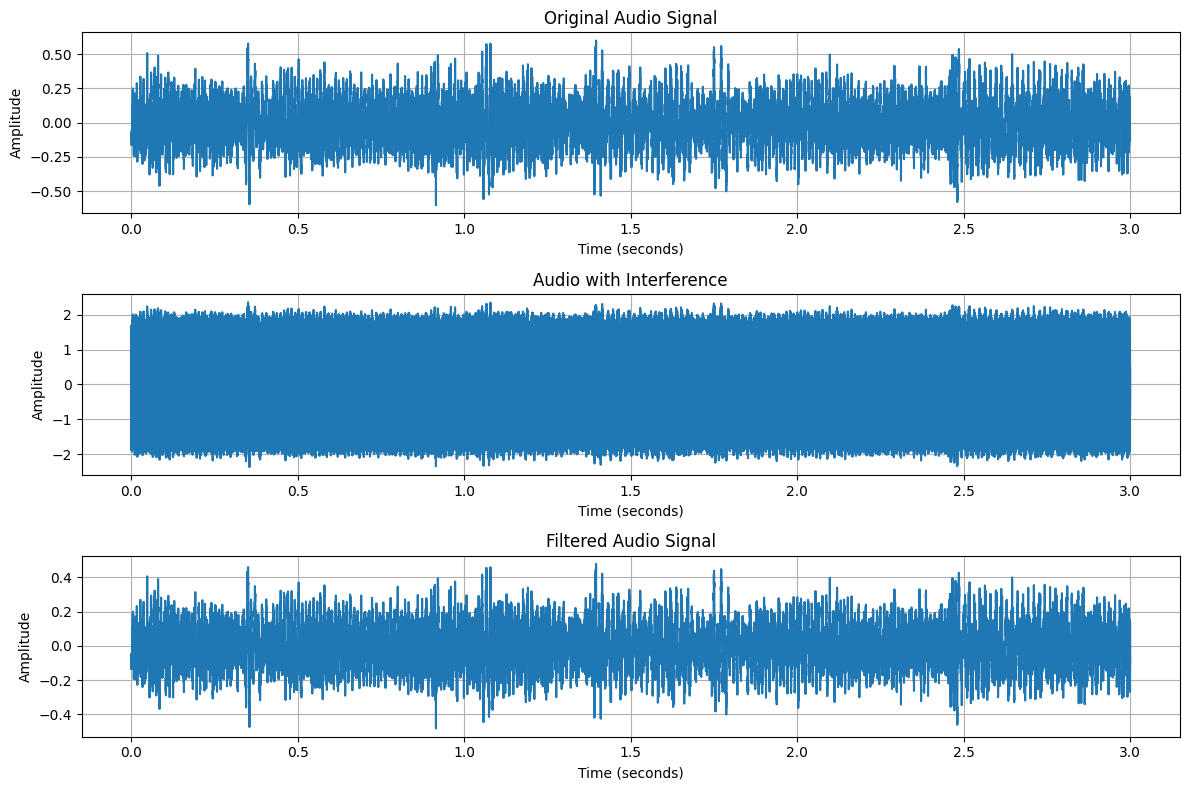

Filtered audio:


In [49]:
# applying the filter
filtered_audio = signal.filtfilt(best_filter_b, best_filter_a, new_segment)
# plot original signal
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time, segment)
plt.title('Original Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
# plot noisy signal
plt.subplot(3, 1, 2)
plt.plot(time, new_segment)
plt.title('Audio with Interference')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
# plot filtered signal
plt.subplot(3, 1, 3)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.autoscale(True)
plt.grid(True)

plt.tight_layout()
plt.show()
# displaying filter audio to paly
print("Filtered audio:")
ipd.display(ipd.Audio(filtered_audio, rate=fs))

***As we see the audio is clear***